In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re

In [3]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

#### Data sources

In [4]:
WORLD_BANK_POPULATION_DATA = ("data/wb_pop_data_new.csv")

In [5]:
WORLD_BANK_POPULATION_DATA_CONTINENTS = ("data/wb_pop_data_new_continents.csv")

In [6]:
WORLD_BANK_FOOD_PRICES = ("data/CMOHistoricalDataAnnual.xlsx")

In [7]:
OWD_FOOD_PRICES = ("data/Real commodity prices_1850-2019.xlsx")

# Population growth and food prices.
## Is there any correlation between them?

## Abstract

The world faced unprecedented population growth in the last 50 years and previous research found that various factors have contributed to it. Among these are fertility rate and life expectancy boosted or hindered by hygiene levels, transport networks, healthcare, family planning, or by poor harvest, famine and diseases. A factor that didn't attract much attention so far is the food prices. Therefore, this paper explores the latter's link to population growth. The zero hypothesis is that correlation between the two variables does not exist, and the opposite assumption is that there is a link between them. The hypothesis is tested by correlation analysis, using data from the World Bank and from "Our World in Data". The final result, however, didn't prove that there a is linear or non-linear correlation between food prices and population increase.

*Key words*: population growth, food prices, correlation.

## Introduction

World population doubled over the past 50 years  - from slightly above 3 bln people it rose to more than 7 bln. Various factors drove this growth. One of them might be the **food prices**. This assumption stems from the very rudimentary knowledge of biology: number of species increase if favourable conditions are in place (e.g. good climate, sufficient food and water, lack of predators and illness); and vice versa: limiting factors such as predators, not enough food, drought, and disease would negatively impact the size of a given animal group. Thus, knowledge about the factors that could drive human population up and down are important not only for all that would try to predict various social and economic trends (e.g. work force size, economic growth and output, social needs, food demand, etc.), but for any person that want to know the causes changing the world today.

It should be noted here that the topic is tightly related to Thomas Malthus's (1766 - 1834) *Theory of Population*. He argued that "populations [will grow] in geometric progression", whereas "food production [will increase] in arithmetic progression" [1]. Therefore, he concludes, "populations will grow faster than the supply of food. This exponential population growth will lead to a shortage of food".

Not that there aren't countries experiencing food shortages today; however, the last 50 years proved that Malthus's assumption was not entirely true. Population grew substantially but food supply is more than sufficient (according to RESET 1.3 billion tonnes of food is wasted globally each year, one third of all food produced for human consumption [2]). Some authors suggest that agriculture is capable of meeting food demand thanks to the increased size of arable lands and to the introduced biotechnologies and innovations [3].

So, for 50 years world population doubled and food production increased a lot. Basic microeconomics teaches that production grows as long as producers gain profit. Thus, under unchanged conditions, it could be assumed that greater demand might, at certain point, lead to higher prices. Or larger agricultural areas and biotechnologies (i.e. increased supply) might push prices down.

This paper aims at studying if (and what) correlation exists between population growth and food prices during the last 50 years (from 1970 until 2019). The exercise is performed by obtaining, cleaning, analysing, and visualising data collected and published by the World Bank and by "Our World in Data". Information about each dataset is provided in the respective section below. The zero hypothesis (H0) is that there is none correlation between the two variables ("population growth" and "food prices dynamics"), whereas H1 states that a link between them exists. Final results are obtained through correlation analysis. A correlation coefficient equal to or very close to -1 or 1 suggests strong (negative or positive) correlation between food prices and population increase, whereas a result approaching 0 would mean that a correlation could not be established.

The Notebook is organised into four chapters. The first one introduces the problem with population growth and prepares population data for further computations and analysis. The hypothesis is formulated in the second chapter. Thereafter (Chapter 3) follows description of data obtaining, cleaning, exploration and visualisation (from two sources). The last chapter presents how the hypothesis is tested. The Notebook ends with chapter titled "Conclusion and Topics for Further Discussion."

## 1. The Problem: Population growth over the last 50 years

Various factors affect population growth, e.g. fertility rate, life expectancy, and migration [4]. Jan Van Bavel takes a longer period to analyse population explosion and the factors causing it [2]. Among them are birth and death rates (terms used instead of fertility rate and life expectancy), which could be influenced by better hygiene and better transportation infrastructure, vaccination, improved healthcare, family planning or by failed harvest, famine and diseases. Change in world population over the last 2000 years is shown on Fig. 1 below.

Fig. 1. Historical growth of the world population since year 0

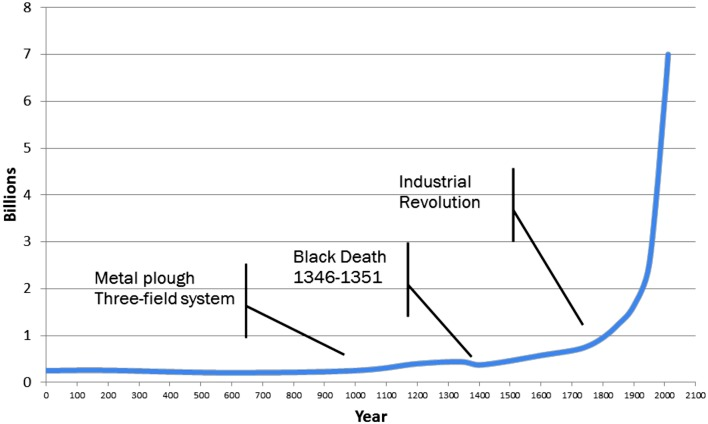

Source: *Van Bavel J. The world population explosion: causes, backgrounds and -projections for the future*

The problem with this unprecedented population growth is that more people on the Earth spend more resources (e.g. water, food, fuels, etc.); they need more dwellings and transportation, and cause more environmental pollution. The latter is of great political concern over the last 20 years, and its prevention involves not only politicians but people from all professional communities. Managing population size is a sensitive issue and a tiny number of countries (e.g. China) have resorted to it so far. As mentioned above, availability of cheap food might have helped for this increase.

The exercise starts with exploring World Bank's population data, which illustrates when, where and how number of people changed over the last 50 years.

### 1.1. Obtain data on World population

Data on world population is published perhaps by many international organisations collecting and storing information under various social and economic indicators. Here, preference is given to the World Bank's dataset for its completeness and easy access. 

World Bank's population data are available [here](https://data.worldbank.org/indicator/SP.POP.TOTL) [6]. The web page offers visualisation, which is not suitable for importing via `pandas`. An attempt for reading the *csv* [file](http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv) by `pd.read_csv("web_link")` throws the following error: "*Error tokenizing data. C error: Expected 3 fields in line 5, saw 65*". A brief search on the Internet shows that other users got this error, too. Following an advice of a "stackoverflow.com" user, the 'csv' file was downloaded and copied.

The file is titled "WORLD_BANK_POPULATION_DATA" and is stored in a constant at the beginning of this paper.

The work starts with calling the file with `pandas`. The first preview showed that there are 4 empty rows, which were therefore skipped.

In [8]:
# Call total population file; skip first 4 (empty) row
world_population = pd.read_csv(WORLD_BANK_POPULATION_DATA, skiprows = 4)

In [9]:
# View word population dataframe
world_population 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0


This preview shows the DataFrame consists of 264 rows and 64 columns. Individual row and column names are checked below.

In [10]:
# Inspect shape
world_population.shape

(264, 64)

In [11]:
# Check all columns
world_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [12]:
# Check how many countries are entered in the dataframe
world_population["Country Name"].unique 

<bound method Series.unique of 0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
259          Kosovo
260     Yemen, Rep.
261    South Africa
262          Zambia
263        Zimbabwe
Name: Country Name, Length: 264, dtype: object>

### 1.2. Clean data on World population

DataFrame preview and the last check show the table has more countries than their [real number](https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/). This is so because the World Bank calculates aggregate data, e.g. for the "Middle East", for "Developed Countries", etc. Hence, these "non-countries" should be removed for avoiding double counting population in some areas. 

The 'columns check' above showed the DataFrame does not have a feature "continent" to which each country belongs. For this reason, initial cleaning and preparation is made manually, in MS Excel. A column titled "continent" was added. Abbreviation of two letters is placed in cells against respective countries; the cells against country groupings remain empty. The abbreviations and their meaning are: "AF" for Africa, "AS" for Asia, "EU" for Europe, "NA" for North America, "SA" for South America, and "AU" for Australia.

Further cleaning starts with reading the new file. The latter is also stored in a constant ("WORLD_BANK_POPULATION_DATA_CONTINENTS)" at the beginning of the paper and has four empty rows, too.

In [13]:
#Call new, manually adjusted file
world_pop = pd.read_csv(WORLD_BANK_POPULATION_DATA_CONTINENTS, skiprows = 4)

In [14]:
# View new file
world_pop

,Country Name,Country Code,Indicator Name,Indicator Code,Continent,1960,1961,1962,1963,1964,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,SA,54211.0,55438.0,56225.0,56695.0,57032.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,AS,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,AF,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,EU,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,EU,13411.0,14375.0,15370.0,16412.0,17469.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,EU,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,AS,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,AF,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,AF,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0


The new DataFrame (stored in `world_pop` variable) has 264 rows and 65 columns. It has 5 'object' type columns; the others with annual population data are floating point numbers. The latter saves time, space and efforts from value type conversion.

In [15]:
# Check column types and where values are missing
world_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   Continent       205 non-null    object 
 5   1960            260 non-null    float64
 6   1961            260 non-null    float64
 7   1962            260 non-null    float64
 8   1963            260 non-null    float64
 9   1964            260 non-null    float64
 10  1965            260 non-null    float64
 11  1966            260 non-null    float64
 12  1967            260 non-null    float64
 13  1968            260 non-null    float64
 14  1969            260 non-null    float64
 15  1970            260 non-null    float64
 16  1971            260 non-null    float64
 17  1972            260 non-null    flo

Columns "Country Code", "Indicator Name", and "Indicator Code" won't be needed for population analysis and visualisation, as well as for juxtaposing its changes with those of food prices. For this reason they are removed from the DataFrame. This operation is followed by a brief check as to if removal was successful.

In [16]:
# Remove three unnecessary columns
world_pop_new = world_pop.drop(["Country Code", "Indicator Name", "Indicator Code"], axis = 1)

In [17]:
# Check if the three columns were removed properly
world_pop_new.head()

,Country Name,Continent,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,SA,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AS,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AF,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,EU,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,EU,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


The next step requires removing all `NaN`(Not a Number) values. This operation aims at removing all country groupings, which didn't get a "continent" value. Upon completion, a code line calls the DataFrame for a brief check if removal was successful.

In [18]:
# Remove Not a Number values; expect all country groupings (e.g. "Small countries", etc.) to be removed.
world_pop_new = world_pop_new.dropna()

In [19]:
# Check if groupings are removed
world_pop_new 

,Country Name,Continent,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,SA,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AS,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AF,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,EU,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,EU,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,EU,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0
260,"Yemen, Rep.",AS,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,5907874.0,...,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0
261,South Africa,AF,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,20406864.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0
262,Zambia,AF,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,3681955.0,3797873.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0


The DataFrame has 201 rows now, which figure is much closer to the real number of countries (195). 

Data cleaning proceeds with making "Country name" column compliant with Python convention, i.e. with converting text to "snake_case" type. Thereafter a brief check as to how the new column looks like is performed.

In [20]:
# Rename "Country Name" column
world_pop_new = world_pop_new.rename(columns={"Country Name":"country_name"})

In [21]:
# Check if "Country Name" column was renamed
world_pop_new.head()

,country_name,Continent,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,SA,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AS,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AF,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,EU,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,EU,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


Countries' name (along with years) is a unique identifier used for analysis. Therefore "country_name" is set for index column. This operation is followed by a brief check as to if the code worked properly.

In [22]:
# Set "country_name" for index
world_pop_new = world_pop_new.set_index("country_name") 

In [23]:
# check if "country_name" was properly set for index
world_pop_new.head()

,Continent,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country_name,,,,,,,,,,,,,,,,,,,,,
Aruba,SA,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,AS,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,AF,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,EU,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,EU,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


As hinted earlier, the analysis spans from 1970 until the last year with available data (2019). Thus, values for previous years are not necessary. Data for year 1969 remains in the DataFrame because will be needed later. The "Continent" column is dropped (division could not be performed on object data type). Cleaned data are stored in a new variable named `certain_years_only`.

Thereafter, for simplifying calculations, all values (population figures per year per country) are divided by 1000. The new data should be read as "thousands" (e.g. '58.726' - fifty eight thousand, seven hundred twenty six). This operation is followed by a brief check.

In [24]:
# Remove columns for years 1960-1968. Year 1969 will be used for further calculations
certain_years_only = world_pop_new.drop(["Continent", "1960", "1961", "1962", "1963", "1964", "1965", "1966", 
                                     "1967", "1968"], axis = 1)

In [25]:
# Divide all values by 1000 for easier calculation and interprertation
certain_years_only = certain_years_only.div(1000)

In [26]:
# Check if division was successful
certain_years_only.head() 

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country_name,,,,,,,,,,,,,,,,,,,,,
Aruba,58.726,59.063,59.440,59.840,60.243,60.528,60.657,60.586,60.366,60.103,...,101.669,102.046,102.560,103.159,103.774,104.341,104.872,105.366,105.845,106.314
Afghanistan,10893.776,11173.642,11475.445,11791.215,12108.963,12412.950,12689.160,12943.093,13171.306,13341.198,...,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.128,36296.400,37172.386,38041.754
Angola,5803.254,5890.365,6040.777,6248.552,6496.962,6761.380,7024.000,7279.509,7533.735,7790.707,...,23356.246,24220.661,25107.931,26015.780,26941.779,27884.381,28842.484,29816.748,30809.762,31825.295
Albania,2081.695,2135.479,2187.853,2243.126,2296.752,2350.124,2404.831,2458.526,2513.546,2566.266,...,2913.021,2905.195,2900.401,2895.092,2889.104,2880.703,2876.101,2873.457,2866.376,2854.191
Andorra,23.058,24.276,25.559,26.892,28.232,29.520,30.705,31.777,32.771,33.737,...,84.449,83.747,82.427,80.774,79.213,78.011,77.297,77.001,77.006,77.142


As division was performed successfully, the "continent" column is returned to the new DataFrame. This time it is typed with lower case, pursuant Python convention. The final version is saved in a new variable called `final_population`.

In [27]:
# Add "continent" column from the former dataframe to the new one
certain_years_only["continent"] = world_pop_new["Continent"] 

In [28]:
# Rename final version of the dataframe
final_population = certain_years_only 

### 1.3. Exploratory analysis and visualisation of data on World population

Exploratory analysis starts with calling DataFrame's final version. Work proceeds with filtering the 20 countries which experienced the highest population growth during the analysed period. They are stored in a variable called `doubled population`. 

In [29]:
# check how the final version of the dataframe looks like
final_population.head() 

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,continent
country_name,,,,,,,,,,,,,,,,,,,,,
Aruba,58.726,59.063,59.440,59.840,60.243,60.528,60.657,60.586,60.366,60.103,...,102.046,102.560,103.159,103.774,104.341,104.872,105.366,105.845,106.314,SA
Afghanistan,10893.776,11173.642,11475.445,11791.215,12108.963,12412.950,12689.160,12943.093,13171.306,13341.198,...,30117.413,31161.376,32269.589,33370.794,34413.603,35383.128,36296.400,37172.386,38041.754,AS
Angola,5803.254,5890.365,6040.777,6248.552,6496.962,6761.380,7024.000,7279.509,7533.735,7790.707,...,24220.661,25107.931,26015.780,26941.779,27884.381,28842.484,29816.748,30809.762,31825.295,AF
Albania,2081.695,2135.479,2187.853,2243.126,2296.752,2350.124,2404.831,2458.526,2513.546,2566.266,...,2905.195,2900.401,2895.092,2889.104,2880.703,2876.101,2873.457,2866.376,2854.191,EU
Andorra,23.058,24.276,25.559,26.892,28.232,29.520,30.705,31.777,32.771,33.737,...,83.747,82.427,80.774,79.213,78.011,77.297,77.001,77.006,77.142,EU


In [30]:
# Filter countries which population doubled since 1970
doubled_population = final_population[final_population["2019"] > final_population["1970"] * 2][["1970", "2019", "continent"]]

A brief look at the DataFrame shows that more than half of the countries doubled their population since 1970.

In [31]:
# Check how the new dataframe looks like
doubled_population 

,1970,2019,continent
country_name,,,
Afghanistan,11173.642,38041.754,AS
Angola,5890.365,31825.295,AF
Andorra,24.276,77.142,EU
United Arab Emirates,234.514,9770.529,AS
American Samoa,27.363,55.312,AU
...,...,...,...
Vanuatu,85.377,299.882,AU
"Yemen, Rep.",6193.384,29161.922,AS
South Africa,22069.776,58558.270,AF


The analysis requires identifying each country with doubled population. To that end, the index column was reset. 

In [32]:
# Return auto- index of the dataframe for easier manipulation later
doubled_population = doubled_population.reset_index()

Standard call for unique values in a Series does not produce the expected output. `pandas` lists only the first and the last five rows.

In [33]:
# Check how many countries doubled their population in the last 50 years
doubled_population.country_name.unique

<bound method Series.unique of 0               Afghanistan
1                    Angola
2                   Andorra
3      United Arab Emirates
4            American Samoa
               ...         
107                 Vanuatu
108             Yemen, Rep.
109            South Africa
110                  Zambia
111                Zimbabwe
Name: country_name, Length: 112, dtype: object>

Another approach for displaying all rows (countries) is by grouping them around a given feature. Here, this is done through grouping by continent. 

The output of the command below shows all countries (in each continent) with their population at the beginning and at the end of the studied period. As data reveal, population "explosion" happened mostly in Africa, Asia, and South America; Europe recorded only one country (Andorra), whereas North America is not in this list.

In [34]:
# Group countries into continents and display population increase
for continent, data in doubled_population.groupby("continent"):
    print("========== {} ==========".format(continent))
    print(data)
    print("==========================")


========== AF ==========
                 country_name       1970        2019 continent
1                      Angola   5890.365   31825.295        AF
6                     Burundi   3479.074   11530.580        AF
7                       Benin   2912.340   11801.151        AF
8                Burkina Faso   5624.600   20321.378        AF
16                   Botswana    627.715    2303.697        AF
17   Central African Republic   1811.144    4745.185        AF
18              Cote d'Ivoire   5102.064   25716.544        AF
19                   Cameroon   6519.762   25876.380        AF
20           Congo, Dem. Rep.  20011.036   86790.567        AF
21                Congo, Rep.   1326.885    5380.508        AF
23                    Comoros    230.054     850.886        AF
24                 Cabo Verde    268.627     549.935        AF
26                   Djibouti    159.659     973.560        AF
28                    Algeria  14464.985   43053.054        AF
30           Egypt, Arab Rep. 

It would be nice to visualise population increase within these continents. To that end data are grouped, counted and sorted by continent. This operation is stored in a new variable (`doubled_population_by_continent`) and is followed by a quick test as to if the code is correct.

In [35]:
# Calculate number of countries with doubled population per continent
doubled_population_by_continent = doubled_population.groupby(("continent")).size().sort_values()

In [36]:
# Check if calculation was performed properly
doubled_population_by_continent

continent
EU     1
AU     4
SA    14
AS    42
AF    51
dtype: int64

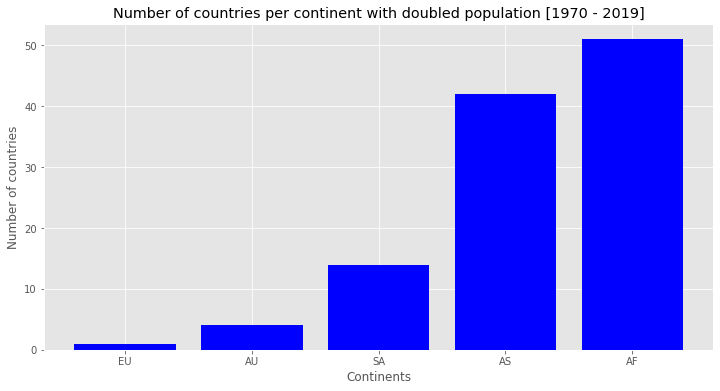

In [37]:
# Plot countries with double population, per continent
plt.style.use("ggplot")
plt.figure(figsize = (12, 6))

plt.bar(doubled_population_by_continent.index, doubled_population_by_continent, color = "b")

plt.title("Number of countries per continent with doubled population [1970 - 2019]")
plt.xlabel("Continents")
plt.ylabel("Number of countries")

plt.show()

The bar chart confirms doubled population in almost all [African](https://www.worldometers.info/geography/how-many-countries-in-africa/), [Asian](https://www.worldometers.info/geography/how-many-countries-in-asia/) and [South American](https://en.wikipedia.org/wiki/List_of_South_American_countries_by_population) countries.

It would be interesting for one to see how much these countries' population grew for the last 50 years. A new DataFrame  (`doubled_population_pct_change`) with a destination column "change_pct" is created for storing further calculations. Growth is determined by dividing change in population by population at the beginning of the analysed period, multiplied by 100.

In [38]:
# Create new dataframe for calculating change in population
doubled_population_pct_change = doubled_population

In [39]:
# Add column for percentage change for the analysed period
doubled_population_pct_change["change_pct"] = (((doubled_population_pct_change["2019"] - doubled_population_pct_change["1970"]) / doubled_population_pct_change["1970"]) * 100)

In [40]:
# Check if the new column and its values are entered properly
doubled_population_pct_change

,country_name,1970,2019,continent,change_pct
0,Afghanistan,11173.642,38041.754,AS,240.459753
1,Angola,5890.365,31825.295,AF,440.294107
2,Andorra,24.276,77.142,EU,217.770638
3,United Arab Emirates,234.514,9770.529,AS,4066.288153
4,American Samoa,27.363,55.312,AU,102.141578
...,...,...,...,...,...
107,Vanuatu,85.377,299.882,AU,251.244480
108,"Yemen, Rep.",6193.384,29161.922,AS,370.856030
109,South Africa,22069.776,58558.270,AF,165.332417
110,Zambia,4179.067,17861.030,AF,327.392765


A check of the new values shows that some countries' population increased much more than twice. The lines below filter  the 20 countries faced largest population growth over the last 50 years, and sort them in ascending order (for proper plotting).

In [41]:
# Filter 20 countries with highest population increase in the last 50 years
twenty_countries_largest_increase = doubled_population_pct_change.sort_values(by = "change_pct", ascending = False).head(20)

In [42]:
# Sort filtered countries in ascending order
twenty_countries_sorted = twenty_countries_largest_increase.sort_values(["change_pct"], ascending = True)

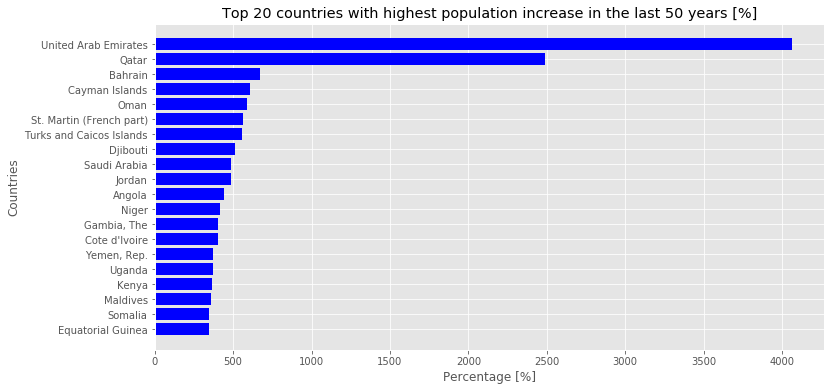

In [43]:
# Plotting the data on the 20 countries
plt.style.use("ggplot")
plt.figure(figsize = (12, 6))

plt.barh(twenty_countries_sorted["country_name"], twenty_countries_sorted["change_pct"], color = "b")

plt.title("Top 20 countries with highest population increase in the last 50 years [%]")
plt.xlabel("Percentage [%]")
plt.ylabel("Countries")

plt.show()

Further analysis requires rows and columns to switch places. Therefore, the DataFrame is transposed and saved into a new variable titled `final_population_tr`. Now, years are set for index, and states are turned into columns. The "Continent" row is removed because might hinder upcoming calculations. A quick check follows below.

In [44]:
# Convert dataframe for further manipulation
final_population_tr = final_population.T

In [45]:
# Check if transposition was successful
final_population_tr.tail()

country_name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2016,104.872,35383.1,28842.5,2876.1,77.297,9360.98,43590.4,2936.15,55.741,94.527,...,29.355,107.51,93638.7,278.33,194.535,1777.56,27168.2,56203.7,16363.5,14030.4
2017,105.366,36296.4,29816.7,2873.46,77.001,9487.2,44044.8,2944.81,55.62,95.426,...,29.577,107.268,94596.6,285.51,195.352,1791,27834.8,57000.5,16853.7,14236.7
2018,105.845,37172.4,30809.8,2866.38,77.006,9630.96,44494.5,2951.78,55.465,96.286,...,29.802,106.977,95540.4,292.68,196.13,1797.09,28498.7,57779.6,17351.8,14439
2019,106.314,38041.8,31825.3,2854.19,77.142,9770.53,44938.7,2957.73,55.312,97.118,...,30.03,106.631,96462.1,299.882,197.097,1794.25,29161.9,58558.3,17861,14645.5
continent,SA,AS,AF,EU,EU,AS,SA,AS,AU,SA,...,SA,SA,AS,AU,AU,EU,AS,AF,AF,AF


In [46]:
# Remove last row ("continent") from dataframe; it will impede further calculations
final_population_tr = final_population_tr.drop(["continent"], axis = 0)

In [47]:
# Check if removal was successful
final_population_tr.tail()

country_name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2015,104.341,34413.6,27884.4,2880.7,78.011,9262.9,43132,2925.55,55.812,93.566,...,29.152,107.71,92677.1,271.13,193.513,1788.2,26497.9,55386.4,15879.4,13814.6
2016,104.872,35383.1,28842.5,2876.1,77.297,9360.98,43590.4,2936.15,55.741,94.527,...,29.355,107.51,93638.7,278.33,194.535,1777.56,27168.2,56203.7,16363.5,14030.4
2017,105.366,36296.4,29816.7,2873.46,77.001,9487.2,44044.8,2944.81,55.62,95.426,...,29.577,107.268,94596.6,285.51,195.352,1791,27834.8,57000.5,16853.7,14236.7
2018,105.845,37172.4,30809.8,2866.38,77.006,9630.96,44494.5,2951.78,55.465,96.286,...,29.802,106.977,95540.4,292.68,196.13,1797.09,28498.7,57779.6,17351.8,14439
2019,106.314,38041.8,31825.3,2854.19,77.142,9770.53,44938.7,2957.73,55.312,97.118,...,30.03,106.631,96462.1,299.882,197.097,1794.25,29161.9,58558.3,17861,14645.5


So far, the DataFrame displays population per country per year. Analysis requires a cumulative sum per year, i.e. the number of people lived on the Earth at the end of each year. For this reason, a new column titled "total" is created. Prior to that, however, all calculations will be stored in `total_population` variable. A check as to if the operations were successful follows below.

In [48]:
# Create variable for summing population of all countries per year
total_population = final_population_tr

In [49]:
# Calculate total population per year
total_population["total"] = total_population.sum(axis = 1)

In [50]:
# Check if calculation was successful
total_population.tail()

country_name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,total
2015,104.341,34413.6,27884.4,2880.7,78.011,9262.9,43132,2925.55,55.812,93.566,...,107.71,92677.1,271.13,193.513,1788.2,26497.9,55386.4,15879.4,13814.6,6.772253e+06
2016,104.872,35383.1,28842.5,2876.1,77.297,9360.98,43590.4,2936.15,55.741,94.527,...,107.51,93638.7,278.33,194.535,1777.56,27168.2,56203.7,16363.5,14030.4,6.852463e+06
2017,105.366,36296.4,29816.7,2873.46,77.001,9487.2,44044.8,2944.81,55.62,95.426,...,107.268,94596.6,285.51,195.352,1791,27834.8,57000.5,16853.7,14236.7,6.932436e+06
2018,105.845,37172.4,30809.8,2866.38,77.006,9630.96,44494.5,2951.78,55.465,96.286,...,106.977,95540.4,292.68,196.13,1797.09,28498.7,57779.6,17351.8,14439,7.010796e+06
2019,106.314,38041.8,31825.3,2854.19,77.142,9770.53,44938.7,2957.73,55.312,97.118,...,106.631,96462.1,299.882,197.097,1794.25,29161.9,58558.3,17861,14645.5,7.088066e+06


Fifty years ago, world population amounted to slightly more than 3 bln people. Now, it exceeds 7 bln. This increase is illustrated on the figure below. It should be noted here that the line resembles the one drawn by the World Bank on its ['Total population' page](https://data.worldbank.org/indicator/SP.POP.TOTL).

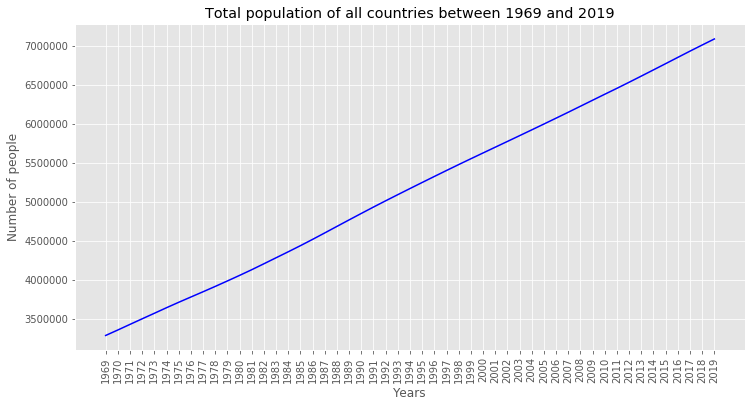

In [51]:
# Plot total population over the analysed period
plt.style.use("ggplot")
plt.figure(figsize = (12,6))

plt.plot(total_population["total"], c = "b")

plt.title("Total population of all countries between 1969 and 2019")
plt.xlabel("Years")
plt.ylabel("Number of people")
plt.xticks(total_population.index,rotation = 90)

plt.show()

Linear increase is not a surprise. It is interesting to see, however, the countries with doubled population. To that end, a new variable (`plot_twenty_countries`) was created to contain their data; visualisation follows below.

In [52]:
# Prepare DataFrame with 20 countries experienced largest population increase for plotting
plot_twenty_countries = final_population_tr[["Angola", "United Arab Emirates", "Bahrain", "Cote d'Ivoire", "Cayman Islands",
                                            "Djibouti", "Gambia, The", "Equatorial Guinea", "Jordan", "Kenya",
                                            "St. Martin (French part)", "Niger", "Oman", "Qatar", "Saudi Arabia",
                                            "Maldives", "Somalia", "Turks and Caicos Islands", "Uganda", "Yemen, Rep."]]

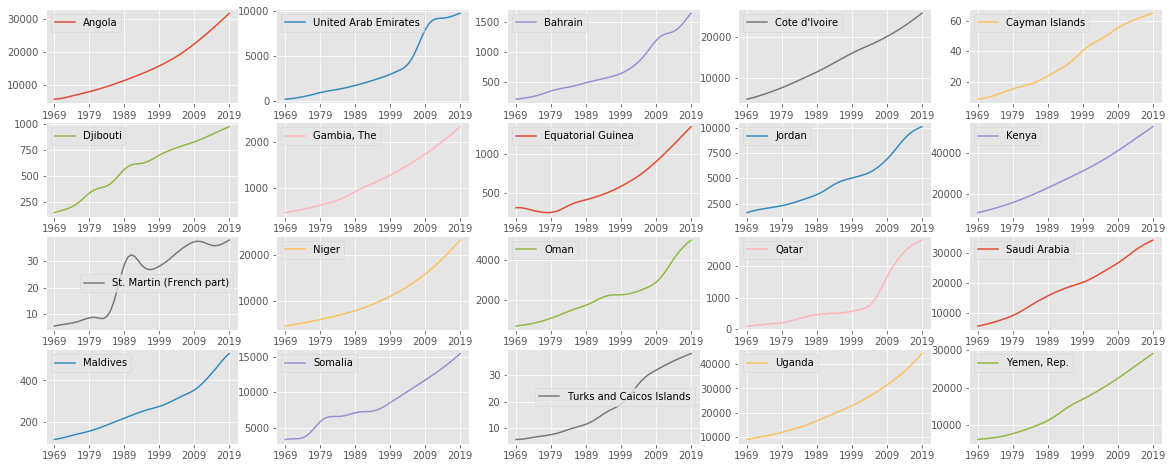

In [53]:
# Plot selected 20 countries using subplots
plt.style.use("ggplot")

plot_twenty_countries.plot(subplots = True, layout = (4, 5), figsize = (20, 8), sharex = False)

plt.show()

The figures above show that all 20 countries (categorised by international community as less developed or developing) experienced steady and continuous population increase for 50 years. Number of people in St. Martin started to rise only in the 1990's. It is noticeable that citizens of many other places tripled (Angola, Cayman Islands, Nigery, Quatar) and quadrupled (Djibouti, Jordan, Saudi Arabia, Uganda). 

On the other hand, it would be fair to see how population changed in developed countries. An appropriate indicator is membership in the OECD\*. In 2020, [37 countries](https://www.oecd.org/about/members-and-partners/) are OECD members. Only twenty of them (from Asia, Europe, and South America) are selected in order to keep the plot as simple and light as possible. Their data are stored in `plot_some_OECD_countries`.

\*Organisation for Economic Cooperation and Development

In [54]:
# Prepare a dataframe with 20 OECD contries to see how their population changed over the years
plot_some_OECD_countries = final_population_tr[["Austria", "Belgium", "Colombia", "Denmark", "Estonia",
                                               "France", "Germany", "Greece", "Ireland", "Italy",
                                               "Japan", "Korea, Rep.", "Lithuania", "Luxembourg", "Netherlands",
                                               "Norway", "Spain", "Sweden", "United Kingdom", "Poland"]]

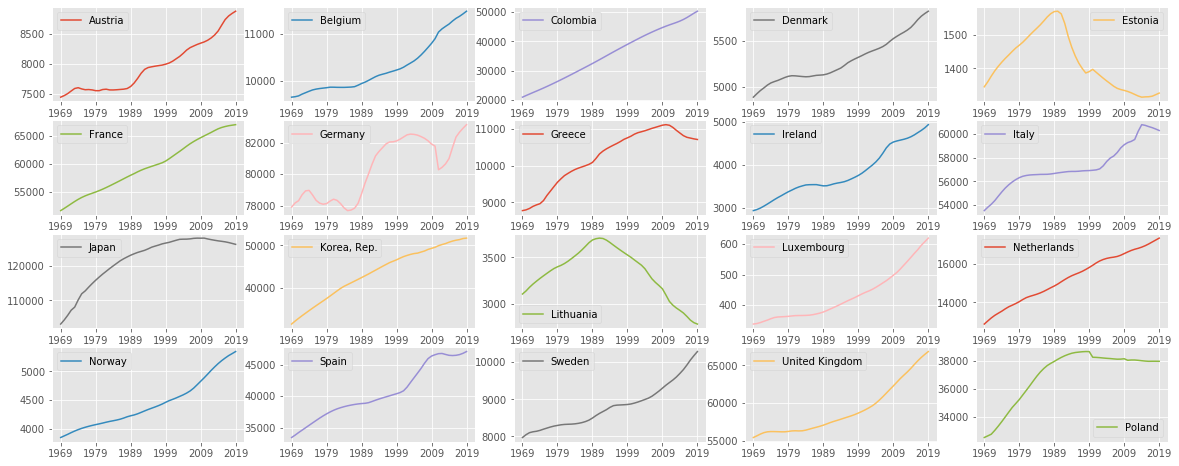

In [55]:
# Plot selected 20 OECD countries using subplots
plt.style.use("ggplot")

plot_some_OECD_countries.plot(subplots = True, layout = (4, 5), figsize = (20, 8), sharex = False)

plt.show()

Some OECD countries experienced insignificant change (e.g. Austria, Belgium, Denmark, Norway, Spain, United Kingdom); others' number dropped (e.g. Estonia, Lithuania, Japan, Poland); and a third group of states faced a substantial increase (e.g. Colombia, Ireland, Luxembourg) but not as huge as their counterparts in Asia and Africa.

The next analytical steps focus on the annual rate of population change. Calculations are made in a new variable called `final_population_pct_change`. Computation is performed with the following formula: 

$$P_c = \frac{(b - a)}{a}$$ 

where:
$P_c$ is the annual percentage change,

$b$ is the number of population in the current year, and

$a$ is the number of population in the preceding year.

The figures in the DataFrame are not converted in percentage (%) for easier perception and further manipulation. Results are displayed below.

In [56]:
# Create variable for storing values with annual change
final_population_pct_change = final_population_tr

In [57]:
# Calculate annual change for each country over the years
final_population_pct_change = final_population_pct_change.rolling(1, axis = 0).sum().pct_change(axis = 0)

In [58]:
# Check if calculations were successful
final_population_pct_change

country_name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,total
1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,0.005739,0.025690,0.015011,0.025837,0.052823,0.154638,0.015433,0.025230,0.024716,9.866247e-03,...,0.052670,0.025945,0.029544,0.018854,0.023510,0.015803,0.026689,0.032955,0.034818,0.021277
1971,0.006383,0.027010,0.025535,0.024526,0.052851,0.183175,0.015871,0.024807,0.022695,2.804743e-03,...,0.117540,0.024865,0.030840,0.015816,0.022970,0.015659,0.026982,0.033538,0.035483,0.021350
1972,0.006729,0.027517,0.034395,0.025264,0.052154,0.192824,0.016225,0.024260,0.020833,-3.480585e-03,...,0.075870,0.023929,0.031803,0.012949,0.024860,0.015931,0.027189,0.034022,0.035956,0.020770
1973,0.006735,0.026948,0.039755,0.023907,0.049829,0.192311,0.016359,0.023505,0.018658,-7.531224e-03,...,0.102229,0.023163,0.032354,0.010645,0.023474,0.017251,0.027128,0.034341,0.035921,0.020139
1974,0.004731,0.025104,0.040699,0.023238,0.045622,0.184548,0.016196,0.022472,0.017045,-8.326787e-03,...,0.069186,0.022617,0.032289,0.008961,0.023700,0.019872,0.026740,0.034457,0.035277,0.019934
1975,0.002131,0.022252,0.038841,0.023278,0.040142,0.172959,0.015846,0.021275,0.015407,-7.050063e-03,...,0.050511,0.022255,0.031878,0.007730,0.022405,0.023333,0.026174,0.034436,0.034314,0.019008
1976,-0.001171,0.020012,0.036377,0.022328,0.034913,0.163452,0.015422,0.020058,0.013443,-4.914240e-03,...,0.017802,0.021903,0.031514,0.006660,0.022644,0.027009,0.025469,0.034297,0.033158,0.018167
1977,-0.003631,0.017632,0.034924,0.022379,0.031280,0.152718,0.015105,0.018966,0.012543,-3.335097e-03,...,-0.030811,0.021610,0.031008,0.005625,0.021429,0.030243,0.024927,0.034174,0.032335,0.017758
1978,-0.004357,0.012899,0.034110,0.020974,0.029477,0.136214,0.014990,0.018012,0.013976,-1.978796e-03,...,0.029248,0.021585,0.030179,0.004980,0.020979,0.032803,0.024850,0.034177,0.032302,0.017734


As was seen above, year "1969" was used for calculating the first annual change. It is removed from the DataFrame now since it won't be needed anymore. A check as to if this operation was performed successfully follows under the code.

In [59]:
# Remove first row (year 1969) because not necessary anymore
final_population_pct_change = final_population_pct_change.drop(["1969"], axis = 0)

In [60]:
# Check if removal was successful
final_population_pct_change.head()

country_name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,total
1970,0.005739,0.025690,0.015011,0.025837,0.052823,0.154638,0.015433,0.025230,0.024716,0.009866,...,0.052670,0.025945,0.029544,0.018854,0.023510,0.015803,0.026689,0.032955,0.034818,0.021277
1971,0.006383,0.027010,0.025535,0.024526,0.052851,0.183175,0.015871,0.024807,0.022695,0.002805,...,0.117540,0.024865,0.030840,0.015816,0.022970,0.015659,0.026982,0.033538,0.035483,0.021350
1972,0.006729,0.027517,0.034395,0.025264,0.052154,0.192824,0.016225,0.024260,0.020833,-0.003481,...,0.075870,0.023929,0.031803,0.012949,0.024860,0.015931,0.027189,0.034022,0.035956,0.020770
1973,0.006735,0.026948,0.039755,0.023907,0.049829,0.192311,0.016359,0.023505,0.018658,-0.007531,...,0.102229,0.023163,0.032354,0.010645,0.023474,0.017251,0.027128,0.034341,0.035921,0.020139
1974,0.004731,0.025104,0.040699,0.023238,0.045622,0.184548,0.016196,0.022472,0.017045,-0.008327,...,0.069186,0.022617,0.032289,0.008961,0.023700,0.019872,0.026740,0.034457,0.035277,0.019934


It is interesting to see the DataFrame's general statistics. It is displayed by calling the `describe()` method over the DataFrame. The figures below show that the average annual increase rate for all countries was around 1.5%. However, some countries population rose by average rate of 8% per year (e.g. United Arab Emirates), whereas others' by only 0.3% (e.g. Armenia). The other statistical indicators aren't of much use now.

In [61]:
# Review statistics for dataframe
final_population_pct_change.describe()

country_name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,total
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.012077,0.025659,0.034629,0.006421,0.024677,0.081913,0.013038,0.003760,0.014797,0.008558,...,0.011825,0.016638,0.026048,0.006797,0.008482,0.031835,0.020262,0.030150,0.021349,0.015451
std,0.016861,0.026438,0.003665,0.013564,0.021826,0.055435,0.002505,0.013744,0.016184,0.009070,...,0.027758,0.006094,0.003609,0.002994,0.022222,0.009077,0.005821,0.003375,0.012278,0.003087
min,-0.012946,-0.026765,0.015011,-0.009341,-0.020054,0.001768,0.007550,-0.023621,-0.014958,-0.008327,...,-0.030811,0.009248,0.017528,0.002553,-0.103764,0.015659,0.012252,0.024273,0.002337,0.011022
25%,0.002354,0.019751,0.033401,-0.006074,0.004458,0.053152,0.010852,-0.006443,0.000489,-0.000259,...,-0.000415,0.010301,0.023810,0.005005,0.004070,0.027141,0.014307,0.027086,0.011555,0.012500
50%,0.005901,0.026263,0.034964,-0.001949,0.033222,0.059644,0.012551,0.002812,0.016373,0.010559,...,0.000848,0.017891,0.025850,0.006229,0.016155,0.029247,0.022454,0.030222,0.017670,0.015156
75%,0.019425,0.035339,0.036256,0.020924,0.041457,0.124987,0.015525,0.016356,0.024835,0.015602,...,0.007825,0.022326,0.028517,0.007847,0.020927,0.038145,0.025443,0.033796,0.034619,0.017944
max,0.062563,0.091889,0.040699,0.027243,0.052851,0.192824,0.016359,0.025230,0.042129,0.021887,...,0.117540,0.025945,0.032354,0.018854,0.024860,0.053001,0.027970,0.034782,0.037258,0.021350


Plotting total annual increase rate reveals its steady downturn trend, i.e. although population continues to grow, this happens more slowly than each preceding year.

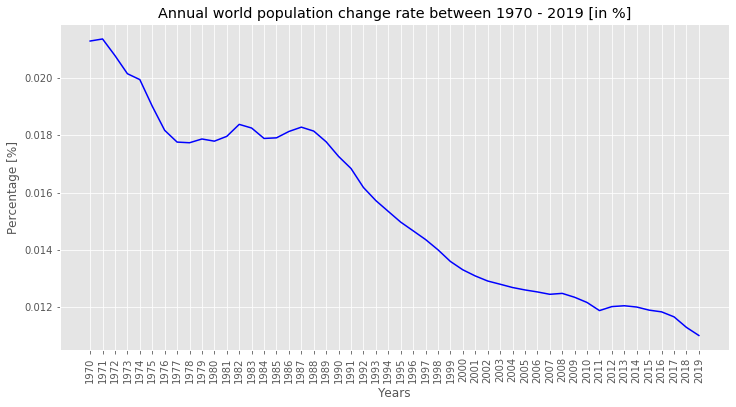

In [62]:
# Plot annual world population change
plt.style.use("ggplot")
plt.figure(figsize = (12, 6))

plt.plot(final_population_pct_change["total"], c = "b")

plt.title("Annual world population change rate between 1970 - 2019 [in %]")
plt.xlabel("Years")
plt.ylabel("Percentage [%]")
plt.xticks(final_population_pct_change.index,rotation = 90)

plt.show()

## 2. Suggest hypothesis: Food prices impact population growth

The first DataFrame explored above (`WORLD_BANK_POPULATION_DATA`) has a separate row with data for all countries (row Number 257: "World", see below). This figure is slightly higher than that calculated in `total_population`. This is so because the latter does not contain data for countries which do not exist anymore (e.g. "Czehoslovakia"), and for these countries' successors (i.e. "Czech Republic" and "Slovakia") due to the empty (NaN) cells, which were dropped earlier.

In [63]:
# Call the "world" data row to check what the WB total figure shows
world_population[world_population["Country Name"] == "World"] 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
257,World,WLD,"Population, total",SP.POP.TOTL,3.031438e+09,3.072481e+09,3.125457e+09,3.190564e+09,3.256065e+09,3.322973e+09,...,6.921872e+09,7.002861e+09,7.085763e+09,7.169640e+09,7.254228e+09,7.338965e+09,7.424282e+09,7.509066e+09,7.591933e+09,7.673534e+09


Despite this insignificant discrepancy, world population still grew more than twice for 50 years. Normally, one would ask which factors contributed to this immense increase. Humans are mammals, and like their animal brethren, they need food. If the latter is sufficient, and predators are not seen around, number of species will grow over time. And vice versa: if there is not enough food, or other animals threaten one's existence, or there is a spread of diseases, the population will start to decline, and in the longer run - to disappear.

Thus, it could be hypothesized that there is a correlation between food prices and (human) population growth. The following rows explore the link between these two "variables." A proof of this assumption will be an existing correlation between food prices and population growth, measured by their respective dummy variables. The correlation between the two datasets could be either linear or non-linear (the latter might be subject to further presumptions and conditions).

The hypothesis is tested with publicly available data from the World Bank and from "Our World in Data". An attempt was made for using UN's "Food and Agriculture Organisation" database, which turned out to be inappropriate for this task (see below).

It should be noted here that there is no need to counter check World Bank population data (since the Bank is deemed a reliable source of socio-economic data). Also, the work is performed with the whole size (both in terms of population and food products), and not with a sample from it.

## 3. Prepare data for testing hypothesis: obtain, clean, explore and visualise

### 3.1. Obtain first set of data: World Bank

World Bank's food prices data are located [here](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjhj62Kg4LrAhViTxUIHdNbD44QFjAAegQIAxAB&url=http%3A%2F%2Fpubdocs.worldbank.org%2Fen%2F226371486076391711%2FCMO-Historical-Data-Annual.xlsx&usg=AOvVaw32xYgMfKQEeHcSPuHa8r5U).  The file size is more than 5 MB, and is not so suitable for work. For this reason, it was downloaded and saved in the "data" folder. Three of its sheets ("Annual Indices (Nominal)", "Annual Indices (Real)", and "Index Weights") were manually removed (deleted) since will not be necessary for the analysis that follows.

The file is stored in a constant (`WORLD_BANK_FOOD_PRICES`) just below the *import* commands at the top of the page. The needed data are found in the "Annual_Prices_Real" sheet. 

The work starts with calling the needed sheet. It is saved in `food_prices_wb`. Its first 6 rows are empty, hence skipped with the calling code line. A quick check of the DataFrame follows below.

In [64]:
# Call WB data on food prices 
food_prices_wb = pd.read_excel((WORLD_BANK_FOOD_PRICES), sheet_name = "Annual_Prices_Real", skiprows = 6)

In [65]:
# View WB data on food prices
food_prices_wb

,Unnamed: 0,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South Afican","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Copra,Steel Index,"Steel, cold rolled coilsheet","Steel, hot rolled coilsheet",Steel rebar,Steel wire rod,"Cotton, Memphis","Rubber, US","Wheat, Canadian",Woodpulp
0,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,($/mt),(2005=100),($/mt),($/mt),($/mt),($/mt),(cents/kg),(cents/kg),($/mt),($/mt)
1,NaN,KCRUDE_PETRO,KCRUDE_BRENT,KCRUDE_DUBAI,KCRUDE_WTI,KCOAL_AUS,KCOAL_SAFRICA,KNGAS_US,KNGAS_EUR,KNGAS_JP,...,KCOPRA,KiSTL_JP_INDX,KSTL_JP_CROLL,KSTL_JP_HROLL,KSTL_JP_REBAR,KSTL_JP_WIROD,KCOTTON_MEMPH,KRUBBER1_US,KWHEAT_CANADI,KWOODPULP
2,1960.0,8.51498,..,8.51498,..,..,..,0.731348,2.1145,..,...,1053.49,..,..,..,..,..,..,..,328.44,..
3,1961.0,8.04502,..,8.04502,..,..,..,0.768633,2.07415,..,...,843.361,..,..,..,..,..,..,..,326.464,..
4,1962.0,7.64614,..,7.64614,..,..,..,0.804857,2.03616,..,...,825.41,..,..,..,..,..,..,..,336.816,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2015.0,51.8637,53.5163,52.2994,49.7754,60.2293,57.9496,2.67092,6.97049,11.174,...,..,..,..,..,..,..,..,..,..,..
58,2016.0,45.5283,46.8423,43.815,45.9277,70.3188,68.004,2.65035,4.85297,7.84022,...,..,..,..,..,..,..,..,..,..,..
59,2017.0,54.2584,55.8896,54.5778,52.3078,90.9547,87.4928,3.04299,5.8744,8.843,...,..,..,..,..,..,..,..,..,..,..
60,2018.0,67.1524,69.8289,67.9425,63.6858,105.151,95.936,3.09992,7.54736,10.4833,...,..,..,..,..,..,..,..,..,..,..


### 3.2. Clean World Bank food prices data

The table above contains rows, which won't be needed for the analysis. Also, column names do not comply with Python convention. Hence, the DataFrame needs an initial data cleaning. Also, it contains non-food products, which are unnecesaary for the upcoming operations. 

The work continues with displaying all unique columns. Thereafter, all non-food products and the second row are dropped off from the table.

In [66]:
# Check unique columns (commodity types)
food_prices_wb.columns.unique() 

Index(['Unnamed: 0', 'Crude oil, average', 'Crude oil, Brent',
       'Crude oil, Dubai', 'Crude oil, WTI', 'Coal, Australian',
       'Coal, South Afican', 'Natural gas, US', 'Natural gas, Europe',
       'Liquefied natural gas, Japan', 'Natural gas index', 'Cocoa',
       'Coffee, Arabica', 'Coffee, Robusta', 'Tea, avg 3 auctions',
       'Tea, Colombo', 'Tea, Kolkata', 'Tea, Mombasa', 'Coconut oil',
       'Groundnuts', 'Fish meal', 'Groundnut oil', 'Palm oil',
       'Palm kernel oil', 'Soybeans', 'Soybean oil', 'Soybean meal', 'Barley',
       'Maize', 'Sorghum', 'Rice, Thai 5% ', 'Rice, Thai 25% ',
       'Rice, Thai A.1', 'Rice, Viet Namese 5%', 'Wheat, US SRW',
       'Wheat, US HRW', 'Banana, Europe', 'Banana, US', 'Orange', 'Beef',
       'Meat, chicken', 'Meat, sheep', 'Shrimps, Mexican', 'Sugar, EU',
       'Sugar, US', 'Sugar, world', 'Tobacco, US import u.v.',
       'Logs, Cameroon', 'Logs, Malaysian', 'Sawnwood, Cameroon',
       'Sawnwood, Malaysian', 'Plywood', 'Cotto

In [67]:
# Remove all non-food related columns
food_prices_wb = food_prices_wb.drop(["Crude oil, average", "Crude oil, Brent", "Crude oil, Dubai", "Crude oil, WTI",
                                     "Coal, Australian", "Coal, South Afican", "Natural gas, US", "Natural gas, Europe",
                                     "Liquefied natural gas, Japan", "Natural gas index", "Tobacco, US import u.v.", 
                                     "Logs, Cameroon", "Logs, Malaysian", "Sawnwood, Cameroon", "Sawnwood, Malaysian",
                                     "Plywood", "Cotton, A Index", "Rubber, TSR20", "Rubber, SGP/MYS", "Phosphate rock",
                                      "DAP", "TSP", "Urea ", "Potassium chloride", "Aluminum", "Iron ore, cfr spot",
                                      "Copper", "Lead", "Tin", "Nickel", "Zinc", "Gold", "Platinum", "Silver",
                                      "MUV Index", "Coal, Colombian", "Copra", "Steel Index", "Steel, cold rolled coilsheet",
                                      "Steel, hot rolled coilsheet", "Steel rebar", "Steel wire rod", "Cotton, Memphis", 
                                      "Rubber, US", "Wheat, Canadian", "Woodpulp"], axis = 1)

In [68]:
# Remove second row (index 1) because its values are not digits
food_prices_wb = food_prices_wb.drop([1], axis = 0)

Instead of 82, the DataFrame has 36 columns now - a much more manageable number. Still, column names need editing to comply with Python rules. Product names are shortened for space efficiency. Almost all food prices are in USD per Kilogram. For this reason, neither unit price is reflected in column names, nor first row (index 0) is kept in the table. The code lines performing these operations are given below.

In [69]:
# Check if removing was successful
food_prices_wb.head()

,Unnamed: 0,Cocoa,"Coffee, Arabica","Coffee, Robusta","Tea, avg 3 auctions","Tea, Colombo","Tea, Kolkata","Tea, Mombasa",Coconut oil,Groundnuts,...,"Banana, Europe","Banana, US",Orange,Beef,"Meat, chicken","Meat, sheep","Shrimps, Mexican","Sugar, EU","Sugar, US","Sugar, world"
0,NaN,($/kg),($/kg),($/kg),($/kg),($/kg),($/kg),($/kg),($/mt),($/mt),...,($/kg),($/kg),($/kg),($/kg),($/kg),($/kg),($/kg),($/kg),($/kg),($/kg)
2,1960.0,3.07697,4.82437,3.63556,5.37906,4.85981,5.8581,5.41929,1631.6,..,...,..,0.746327,0.679022,3.84759,1.56785,..,8.38803,0.639179,0.657414,0.345867
3,1961.0,2.45224,4.58895,3.43034,4.87723,4.57337,5.01457,5.04325,1298.56,..,...,..,0.691368,0.681564,3.49446,1.60019,..,8.67983,0.637148,0.643927,0.304635
4,1962.0,2.30373,4.18823,3.43173,4.89453,4.33114,5.55653,4.79594,1263.71,..,...,..,0.660938,0.54332,3.5923,1.60751,..,11.3303,0.635458,0.645994,0.310289
5,1963.0,2.83032,4.1288,3.19499,4.88287,4.17522,5.55261,4.9213,1467.23,..,...,..,0.738315,0.481719,3.41448,1.68089,..,10.2332,0.649575,0.850096,0.938928


In [70]:
# Rename colums (do not place price per measurement unit to save space)
food_prices_wb = food_prices_wb.rename(columns={"Unnamed: 0": "year", "Cocoa": "cocoa", "Coffee, Arabica":"cof_arab",
                                                "Coffee, Robusta":"cof_rob", "Tea, avg 3 auctions":"tea_3",
                                                "Tea, Colombo":"tea_col", "Tea, Kolkata":"tea_kol", 
                                                "Tea, Mombasa":"tea_mom", "Coconut oil":"coconut_oil",
                                                "Groundnuts":"groundnuts", "Fish meal":"fish_meal", 
                                                "Groundnut oil":"groundnut_oil", "Palm oil":"palm_oil",
                                                "Palm kernel oil":"palm_kernel_oil", "Soybeans":"soybeans",
                                                "Soybean oil":"soybean_oil", "Soybean meal":"soybean_meal",
                                                "Barley":"barley", "Maize":"maize", "Sorghum":"sorghum",
                                                "Rice, Thai 5% ":"rice_thai_5", "Rice, Thai 25% ":"rice_thai_25",
                                                "Rice, Thai A.1":"rice_thai_a1", "Rice, Viet Namese 5%":"rice_vnm_5",
                                                "Wheat, US SRW":"wheat_us_srw", "Wheat, US HRW":"wheat_us_hrw",
                                                "Banana, Europe":"banana_eu",
                                                "Banana, US":"banana_us", "Orange":"orange", "Beef":"beef",
                                                "Meat, chicken":"meat_ckn", "Meat, sheep":"meat_shp",
                                                "Shrimps, Mexican":"shrimps_mex", "Sugar, EU":"sugar_eu",
                                                "Sugar, US":"sugar_us", "Sugar, world":"sugar_wld"})

In [71]:
# Remove zero-row (measurment units) because not neccessary anymore.
food_prices_wb = food_prices_wb.drop([0])

The DataFrame is almost clean. However, as can be seen below, there are `NaN` values within certain features. Before the latter are being filled in, columns' type should be checked. 

In [72]:
# Check if column renaming and first row removal were successful
food_prices_wb

,year,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
2,1960.0,3.07697,4.82437,3.63556,5.37906,4.85981,5.8581,5.41929,1631.6,..,...,..,0.746327,0.679022,3.84759,1.56785,..,8.38803,0.639179,0.657414,0.345867
3,1961.0,2.45224,4.58895,3.43034,4.87723,4.57337,5.01457,5.04325,1298.56,..,...,..,0.691368,0.681564,3.49446,1.60019,..,8.67983,0.637148,0.643927,0.304635
4,1962.0,2.30373,4.18823,3.43173,4.89453,4.33114,5.55653,4.79594,1263.71,..,...,..,0.660938,0.54332,3.5923,1.60751,..,11.3303,0.635458,0.645994,0.310289
5,1963.0,2.83032,4.1288,3.19499,4.88287,4.17522,5.55261,4.9213,1467.23,..,...,..,0.738315,0.481719,3.41448,1.68089,..,10.2332,0.649575,0.850096,0.938928
6,1964.0,2.55576,5.10281,3.97744,4.68459,4.13882,5.25311,4.66235,1498.24,..,...,..,0.861158,0.424494,4.2494,1.70622,..,9.1635,0.639681,0.700957,0.638383
7,1965.0,1.8285,5.0071,3.3949,5.00685,4.23603,5.71811,5.06641,1752.54,..,...,..,0.797894,0.480513,4.4128,1.75307,..,9.94979,0.623471,0.681404,0.22132
8,1966.0,2.49881,4.4833,3.56809,4.22069,3.66977,4.5797,4.41318,1562.66,..,...,..,0.742409,0.40562,4.93526,1.75535,..,11.1746,0.632166,0.680234,0.19217
9,1967.0,2.86217,4.13551,3.53691,4.0012,3.43882,3.82187,4.7432,1561.73,..,...,..,0.75907,0.760904,4.98215,1.78087,..,10.9718,0.619273,0.704199,0.201262
10,1968.0,3.47997,4.18533,3.60268,3.61425,3.26833,3.54007,4.03472,1927.41,..,...,..,0.73899,0.811039,5.2387,1.85323,..,12.4517,0.541704,0.737881,0.202428
11,1969.0,4.1134,4.01721,3.34368,3.3275,2.73275,3.9528,3.29725,1655.35,..,...,..,0.730878,0.779104,5.60326,1.83598,..,13.1322,0.514177,0.721431,0.323456


In [73]:
# Check column types
food_prices_wb.dtypes

year               float64
cocoa               object
cof_arab            object
cof_rob             object
tea_3               object
tea_col             object
tea_kol             object
tea_mom             object
coconut_oil         object
groundnuts          object
fish_meal           object
groundnut_oil       object
palm_oil            object
palm_kernel_oil     object
soybeans            object
soybean_oil         object
soybean_meal        object
barley              object
maize               object
sorghum             object
rice_thai_5         object
rice_thai_25        object
rice_thai_a1        object
rice_vnm_5          object
wheat_us_srw        object
wheat_us_hrw        object
banana_eu           object
banana_us           object
orange              object
beef                object
meat_ckn            object
meat_shp            object
shrimps_mex         object
sugar_eu            object
sugar_us            object
sugar_wld           object
dtype: object

`dtypes` check returned "object" type for all columns with food prices. Calculations will require either an "int" or a "float" data type. Thus, the next step is to convert columns' value into integers. The updated DataFrame is stored in a new variable titled `food_prices_wb_update`. A check if these operations were successful follows below.

In [74]:
# Convert all "öbject" columns to numeric ones
food_prices_wb_update = food_prices_wb.convert_dtypes(convert_integer = True)

In [75]:
# Check if conversion was successful
food_prices_wb_update.dtypes

year                 Int64
cocoa              float64
cof_arab           float64
cof_rob            float64
tea_3              float64
tea_col            float64
tea_kol            float64
tea_mom            float64
coconut_oil        float64
groundnuts          object
fish_meal           object
groundnut_oil      float64
palm_oil           float64
palm_kernel_oil     object
soybeans           float64
soybean_oil        float64
soybean_meal       float64
barley             float64
maize              float64
sorghum            float64
rice_thai_5        float64
rice_thai_25        object
rice_thai_a1        object
rice_vnm_5          object
wheat_us_srw        object
wheat_us_hrw       float64
banana_eu           object
banana_us          float64
orange             float64
beef               float64
meat_ckn           float64
meat_shp            object
shrimps_mex        float64
sugar_eu           float64
sugar_us           float64
sugar_wld          float64
dtype: object

No. Still there are "object" columns. The next code line calls all values from a "suspicious" column to check what makes it non-numeric type. The very first element in the array is a two-dot string. All other values seem floating point numbers, which is fine.

In [76]:
# Check why this column was not converted successfully
food_prices_wb_update.groundnuts.unique()

array(['..', 1895.8920070888, 1925.63399187444, 1306.15387070619,
       1565.22217093574, 1386.98696183229, 1132.14452499994,
       1447.30293193149, 1008.23840509628, 1168.03542033276,
       1026.58270442788, 1603.31706357672, 1511.17224240191,
       957.696002662255, 1265.19093473262, 1140.33120191803,
       989.900240634105, 1066.88998993293, 1150.36718676546,
       1203.28442359749, 1071.62091140519, 1094.37414891007,
       1131.44031239661, 955.76196681356, 1252.46280210189,
       1162.16408848742, 996.782858363252, 973.312248290281,
       1307.30016696781, 1556.87304076303, 1171.46082316557,
       1240.65736285703, 1697.20867856798, 2217.20505909437,
       1380.46941417976, 1162.76756249533, 1333.43503149436,
       1481.23773867278, 1527.60220619946, 1299.18102350121,
       1338.22858804815], dtype=object)

A test checking if there are two-dot values in other columns (25 lb Thailand rice and US wheat) is performed, too. Results are positive.

In [77]:
food_prices_wb_update["rice_thai_25"] == ".."

2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28    False
29    False
30     True
31     True
32     True
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
Name: rice_thai_25, dtype: bool

In [78]:
food_prices_wb_update["wheat_us_srw"] == ".."

2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
Name: wheat_us_srw, dtype: bool

Thus, it could be assumed that all 9 "object" columns have "two-dots" values instead of an "int" or "float" number.  This lack of real values might be because the commodity wasn't traded on the stock in the given year(s), there were not data, etc. Nonetheless, these "empty" cells should be filled since they are needed for further calculations. Rows with `NaN` cells should not be dropped off because the analysis requires a continuous time series. Placing "0s" is not an option either since zeroes will distort price (increasing or decreasing) trends. 

Work moves ahead with replacing dots with `NaN` through a regular expression. Thereafter, each `NaN` in an "object" column is replaced with the mean value of the remaining figures of the same column. The latter seems the most appropriate approach for filling `NaN` cells (instead of filling forward or backward values, or entering zeroes).

In [79]:
# Replace dots ("..") with Not a Number (for easier computation later)
food_prices_wb_update = food_prices_wb_update.replace("\.+", np.nan, regex = True)

In [80]:
# Check if two dots are replaced with NaNs
food_prices_wb_update.head(10)

,year,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
2,1960,3.076972,4.824370,3.635560,5.379063,4.859811,5.858101,5.419287,1631.602033,NaN,...,NaN,0.746327,0.679022,3.847586,1.567854,NaN,8.388027,0.639179,0.657414,0.345867
3,1961,2.452238,4.588952,3.430336,4.877232,4.573371,5.014566,5.043255,1298.562651,NaN,...,NaN,0.691368,0.681564,3.494462,1.600189,NaN,8.679829,0.637148,0.643927,0.304635
4,1962,2.303734,4.188231,3.431727,4.894534,4.331139,5.556534,4.795937,1263.708714,NaN,...,NaN,0.660938,0.543320,3.592301,1.607509,NaN,11.330302,0.635458,0.645994,0.310289
5,1963,2.830320,4.128797,3.194988,4.882869,4.175218,5.552609,4.921298,1467.234880,NaN,...,NaN,0.738315,0.481719,3.414481,1.680893,NaN,10.233160,0.649575,0.850096,0.938928
6,1964,2.555764,5.102810,3.977445,4.684591,4.138818,5.253115,4.662354,1498.235337,NaN,...,NaN,0.861158,0.424494,4.249401,1.706219,NaN,9.163505,0.639681,0.700957,0.638383
7,1965,1.828495,5.007100,3.394898,5.006850,4.236030,5.718114,5.066413,1752.539144,NaN,...,NaN,0.797894,0.480513,4.412798,1.753072,NaN,9.949793,0.623471,0.681404,0.221320
8,1966,2.498808,4.483300,3.568088,4.220691,3.669771,4.579702,4.413181,1562.660248,NaN,...,NaN,0.742409,0.405620,4.935263,1.755354,NaN,11.174645,0.632166,0.680234,0.192170
9,1967,2.862174,4.135505,3.536912,4.001198,3.438824,3.821868,4.743198,1561.726064,NaN,...,NaN,0.759070,0.760904,4.982147,1.780872,NaN,10.971784,0.619273,0.704199,0.201262
10,1968,3.479971,4.185331,3.602676,3.614253,3.268330,3.540072,4.034715,1927.408362,NaN,...,NaN,0.738990,0.811039,5.238703,1.853226,NaN,12.451747,0.541704,0.737881,0.202428
11,1969,4.113398,4.017212,3.343675,3.327497,2.732750,3.952796,3.297254,1655.347955,NaN,...,NaN,0.730878,0.779104,5.603257,1.835977,NaN,13.132231,0.514177,0.721431,0.323456


In [81]:
# 1. Calculate and display mean of "groundnuts"
mean_groundnuts = food_prices_wb_update["groundnuts"].mean()
mean_groundnuts

1302.547207705561

In [82]:
# 2. Calculate and display mean of "fish_meal"
mean_fish_meal = food_prices_wb_update["fish_meal"].mean()
mean_fish_meal

871.1335586156252

In [83]:
# 3. Calculate and display mean of "palm_kernel_oil"
mean_palm_kernel_oil = food_prices_wb_update["palm_kernel_oil"].mean()
mean_palm_kernel_oil

873.6020919720318

In [84]:
# 4. Calculate and display mean of "rice_thai_25"
mean_rice_thai_25 = food_prices_wb_update["rice_thai_25"].mean()
mean_rice_thai_25

324.28779815596187

In [85]:
# 5. Calculate and display mean of "rice_thai_a1"
mean_rice_thai_a1 = food_prices_wb_update["rice_thai_a1"].mean()
mean_rice_thai_a1

290.0383481529261

In [86]:
# 6. Calculate and display mean of "rice_vnm_5"
mean_rice_vnm_5 = food_prices_wb_update["rice_vnm_5"].mean()
mean_rice_vnm_5

377.33594449043926

In [87]:
# 7. Calculate and display mean of "wheat_us_srw"
mean_wheat_us_srw = food_prices_wb_update["wheat_us_srw"].mean()
mean_wheat_us_srw

195.20069894820818

In [88]:
# 8. Calculate and display mean of "banana_eu"
mean_banana_eu = food_prices_wb_update["banana_eu"].mean()
mean_banana_eu

1.0283793673021073

In [89]:
# 9. Calculate and display mean of "meat_shp"
mean_meat_shp = food_prices_wb_update["meat_shp"].mean()
mean_meat_shp

4.067590557340635

In [90]:
# Make copy of the updated file for avoiding making mistakes in the latter
food_prices_wb_update_copy = food_prices_wb_update

In [91]:
# Fill NaNs with mean values in each column
food_prices_wb_update_copy["groundnuts"] = food_prices_wb_update_copy["groundnuts"].fillna(value=mean_groundnuts)
food_prices_wb_update_copy["fish_meal"] = food_prices_wb_update_copy["fish_meal"].fillna(value=mean_fish_meal)
food_prices_wb_update_copy["palm_kernel_oil"] = food_prices_wb_update_copy["palm_kernel_oil"].fillna(value=mean_palm_kernel_oil)
food_prices_wb_update_copy["rice_thai_25"] = food_prices_wb_update_copy["rice_thai_25"].fillna(value=mean_rice_thai_25)
food_prices_wb_update_copy["rice_thai_a1"] = food_prices_wb_update_copy["rice_thai_a1"].fillna(value=mean_rice_thai_a1)
food_prices_wb_update_copy["rice_vnm_5"] = food_prices_wb_update_copy["rice_vnm_5"].fillna(value=mean_rice_vnm_5)
food_prices_wb_update_copy["wheat_us_srw"] = food_prices_wb_update_copy["wheat_us_srw"].fillna(value=mean_wheat_us_srw)
food_prices_wb_update_copy["banana_eu"] = food_prices_wb_update_copy["banana_eu"].fillna(value=mean_banana_eu)
food_prices_wb_update_copy["meat_shp"] = food_prices_wb_update_copy["meat_shp"].fillna(value=mean_meat_shp)

The code line below checks if the above operations were successful. It seems so. The next important step is to confirm that values in all columns are of numeric type. In the meantime, the data are copied to a new variable `food_prices_wb_update_copy` (to prevent making mistakes in the existing one).

In [92]:
# Check if filling was successful
food_prices_wb_update_copy.head(10)

,year,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
2,1960,3.076972,4.824370,3.635560,5.379063,4.859811,5.858101,5.419287,1631.602033,1302.547208,...,1.028379,0.746327,0.679022,3.847586,1.567854,4.067591,8.388027,0.639179,0.657414,0.345867
3,1961,2.452238,4.588952,3.430336,4.877232,4.573371,5.014566,5.043255,1298.562651,1302.547208,...,1.028379,0.691368,0.681564,3.494462,1.600189,4.067591,8.679829,0.637148,0.643927,0.304635
4,1962,2.303734,4.188231,3.431727,4.894534,4.331139,5.556534,4.795937,1263.708714,1302.547208,...,1.028379,0.660938,0.543320,3.592301,1.607509,4.067591,11.330302,0.635458,0.645994,0.310289
5,1963,2.830320,4.128797,3.194988,4.882869,4.175218,5.552609,4.921298,1467.234880,1302.547208,...,1.028379,0.738315,0.481719,3.414481,1.680893,4.067591,10.233160,0.649575,0.850096,0.938928
6,1964,2.555764,5.102810,3.977445,4.684591,4.138818,5.253115,4.662354,1498.235337,1302.547208,...,1.028379,0.861158,0.424494,4.249401,1.706219,4.067591,9.163505,0.639681,0.700957,0.638383
7,1965,1.828495,5.007100,3.394898,5.006850,4.236030,5.718114,5.066413,1752.539144,1302.547208,...,1.028379,0.797894,0.480513,4.412798,1.753072,4.067591,9.949793,0.623471,0.681404,0.221320
8,1966,2.498808,4.483300,3.568088,4.220691,3.669771,4.579702,4.413181,1562.660248,1302.547208,...,1.028379,0.742409,0.405620,4.935263,1.755354,4.067591,11.174645,0.632166,0.680234,0.192170
9,1967,2.862174,4.135505,3.536912,4.001198,3.438824,3.821868,4.743198,1561.726064,1302.547208,...,1.028379,0.759070,0.760904,4.982147,1.780872,4.067591,10.971784,0.619273,0.704199,0.201262
10,1968,3.479971,4.185331,3.602676,3.614253,3.268330,3.540072,4.034715,1927.408362,1302.547208,...,1.028379,0.738990,0.811039,5.238703,1.853226,4.067591,12.451747,0.541704,0.737881,0.202428
11,1969,4.113398,4.017212,3.343675,3.327497,2.732750,3.952796,3.297254,1655.347955,1302.547208,...,1.028379,0.730878,0.779104,5.603257,1.835977,4.067591,13.132231,0.514177,0.721431,0.323456


In [93]:
# Check if still there are "object" columns or they were automatically converted to "float" type
food_prices_wb_update_copy.dtypes

year                 Int64
cocoa              float64
cof_arab           float64
cof_rob            float64
tea_3              float64
tea_col            float64
tea_kol            float64
tea_mom            float64
coconut_oil        float64
groundnuts         float64
fish_meal          float64
groundnut_oil      float64
palm_oil           float64
palm_kernel_oil    float64
soybeans           float64
soybean_oil        float64
soybean_meal       float64
barley             float64
maize              float64
sorghum            float64
rice_thai_5        float64
rice_thai_25       float64
rice_thai_a1       float64
rice_vnm_5         float64
wheat_us_srw       float64
wheat_us_hrw       float64
banana_eu          float64
banana_us          float64
orange             float64
beef               float64
meat_ckn           float64
meat_shp           float64
shrimps_mex        float64
sugar_eu           float64
sugar_us           float64
sugar_wld          float64
dtype: object

The outcome above proves that the values in all columns are of numeric type. The next step of the data cleaning process is to set "year" for index column. A check as to if this operation was successful follows below.

In [94]:
# Set year for index column
food_prices_wb_update_copy = food_prices_wb_update_copy.set_index("year")

In [95]:
# Check if index set properly
food_prices_wb_update_copy.head()

,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,fish_meal,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
year,,,,,,,,,,,,,,,,,,,,,
1960,3.076972,4.824370,3.635560,5.379063,4.859811,5.858101,5.419287,1631.602033,1302.547208,871.133559,...,1.028379,0.746327,0.679022,3.847586,1.567854,4.067591,8.388027,0.639179,0.657414,0.345867
1961,2.452238,4.588952,3.430336,4.877232,4.573371,5.014566,5.043255,1298.562651,1302.547208,871.133559,...,1.028379,0.691368,0.681564,3.494462,1.600189,4.067591,8.679829,0.637148,0.643927,0.304635
1962,2.303734,4.188231,3.431727,4.894534,4.331139,5.556534,4.795937,1263.708714,1302.547208,871.133559,...,1.028379,0.660938,0.543320,3.592301,1.607509,4.067591,11.330302,0.635458,0.645994,0.310289
1963,2.830320,4.128797,3.194988,4.882869,4.175218,5.552609,4.921298,1467.234880,1302.547208,871.133559,...,1.028379,0.738315,0.481719,3.414481,1.680893,4.067591,10.233160,0.649575,0.850096,0.938928
1964,2.555764,5.102810,3.977445,4.684591,4.138818,5.253115,4.662354,1498.235337,1302.547208,871.133559,...,1.028379,0.861158,0.424494,4.249401,1.706219,4.067591,9.163505,0.639681,0.700957,0.638383


At the end, years before 1969 are removed from the DataFrame for making it comparable with the population table. As above, year 1969 remains for the time being since its values will be needed later. The last code line in the 'Data clean' section shows the columns that remain in the table.

In [96]:
# Remove years from 1960 to 1968 to make datafreame comparable to population df in terms of period. Year 1969 remains
# since it will be used for further computations
food_prices_wb_update_copy = food_prices_wb_update_copy.drop([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
                                                             1968], axis = 0)

In [97]:
# Check if removal was successful
food_prices_wb_update_copy

,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,fish_meal,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
year,,,,,,,,,,,,,,,,,,,,,
1969,4.113398,4.017212,3.343675,3.327497,2.732750,3.952796,3.297254,1655.347955,1302.547208,871.133559,...,1.028379,0.730878,0.779104,5.603257,1.835977,4.067591,13.132231,0.514177,0.721431,0.323456
1970,2.907652,4.939203,3.935260,3.596873,2.699340,4.267428,3.823453,1710.919929,1302.547208,871.133559,...,1.028379,0.715426,0.723862,5.618409,1.809085,4.067591,11.775900,0.483382,0.712252,0.354267
1971,2.203595,4.062622,3.815649,3.484349,2.771831,3.988627,3.692863,1497.161272,1302.547208,871.133559,...,1.028379,0.574109,0.626707,5.512503,1.802472,3.263444,13.544860,0.466244,0.716373,0.405904
1972,2.418084,4.166282,3.740068,2.937152,2.626969,3.140832,3.043631,878.845828,1302.547208,871.133559,...,1.028379,0.511027,0.581930,5.558088,1.774602,4.010490,15.479640,0.563310,0.706379,0.601799
1973,3.661782,4.446750,3.560960,2.552105,2.142008,2.803561,2.710703,1660.914453,1302.547208,871.133559,...,1.028379,0.469729,0.527737,6.510509,1.712968,4.503733,16.202779,0.476090,0.734478,0.675293
1974,4.147190,3.856365,3.436640,2.905889,2.364208,3.333237,3.020196,2650.331895,1302.547208,871.133559,...,1.028379,0.488831,0.488776,4.203580,1.484865,3.782131,12.358543,0.623540,1.726828,1.739686
1975,2.980658,3.449825,3.219524,2.732230,2.108497,3.465274,2.622963,941.323503,1302.547208,871.133559,...,1.028379,0.520698,0.545437,3.174644,1.388973,3.534668,14.081184,0.814327,1.185210,1.079093
1976,4.834464,7.436102,6.648549,2.805364,2.192003,3.351494,2.872510,988.988414,1302.547208,871.133559,...,1.028379,0.611077,0.510446,3.736178,1.442233,3.700928,19.641327,0.697649,0.693438,0.602196
1977,8.285695,11.299973,10.784007,4.272723,3.707366,4.519628,4.591221,1263.965207,1302.547208,871.133559,...,1.028379,0.598461,0.555285,3.293378,1.424904,3.717839,17.302556,0.675354,0.530363,0.391177


### 3.3. Exploratory analysis and visualisation of World Bank food prices data

The first exploratory step is to check DataFrame's dimensions by applying `pandas` `shape` function. The outcome shows 51 rows and 35 columns (food products). 

Data exploration proceeds with checking as to if there is any correlation between food prices. This is performed by applying `pandas` `corr.()` function. Values between 0 and 1 mean positive correlation (i.e. both variables change in the same direction), and between -1 and 0 - negative correlation (variables change in opposite directions). The closest the value to 1 or to -1, the strongest correlation is. And vice versa: a value approaching 0 indicates for lack of for or weak correlation between two attributes (food prices) (i.e. no relationship in the change of the variables).

`pandas` `corr.()` function evaluates each item against another, i.e. the price of each product is measured against the values of all other foods.

In [98]:
# Check DataFrame shape
food_prices_wb_update_copy.shape

(51, 35)

In [99]:
# Check correlation between food prices changes over the years
food_prices_wb_update_copy.corr()

,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,fish_meal,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
cocoa,1.000000,0.862014,0.877130,0.610947,0.171173,0.663850,0.677673,0.521815,0.205831,0.114325,...,-0.032194,-0.076697,-0.129148,0.389144,-0.210342,0.051422,0.314329,-0.107985,0.258776,0.292310
cof_arab,0.862014,1.000000,0.937873,0.590068,0.147534,0.657301,0.655196,0.392001,0.227263,-0.012615,...,0.027868,-0.137645,-0.270837,0.267924,-0.308240,-0.058363,0.456004,-0.097790,0.145674,0.176409
cof_rob,0.877130,0.937873,1.000000,0.594853,0.050125,0.735424,0.682257,0.395251,0.184623,-0.147287,...,0.004253,-0.286540,-0.367521,0.303858,-0.431469,-0.237519,0.518960,0.039019,0.211987,0.220724
tea_3,0.610947,0.590068,0.594853,1.000000,0.708096,0.839550,0.940774,0.644203,0.289950,0.262390,...,-0.153128,0.219299,-0.053776,0.525016,0.128089,0.050477,0.190577,-0.458633,0.285702,0.175855
tea_col,0.171173,0.147534,0.050125,0.708096,1.000000,0.255560,0.524862,0.441170,0.194768,0.682069,...,-0.209922,0.680543,0.354341,0.295607,0.645619,0.455663,-0.207059,-0.670911,-0.018571,-0.020664
tea_kol,0.663850,0.657301,0.735424,0.839550,0.255560,1.000000,0.816217,0.511904,0.244292,-0.153859,...,-0.035988,-0.170082,-0.315605,0.473788,-0.330118,-0.326974,0.410180,-0.145461,0.401576,0.222827
tea_mom,0.677673,0.655196,0.682257,0.940774,0.524862,0.816217,1.000000,0.652389,0.282554,0.145819,...,-0.140599,0.054407,-0.157773,0.535693,0.028262,0.018744,0.257147,-0.337991,0.318936,0.231864
coconut_oil,0.521815,0.392001,0.395251,0.644203,0.441170,0.511904,0.652389,1.000000,0.252836,0.334594,...,-0.099366,0.120398,0.026448,0.611436,0.160798,0.253299,-0.034198,-0.414506,0.543587,0.523252
groundnuts,0.205831,0.227263,0.184623,0.289950,0.194768,0.244292,0.282554,0.252836,1.000000,0.321927,...,-0.157783,0.275444,0.089982,0.323129,-0.038615,0.294484,-0.064356,-0.346838,0.173854,0.275704
fish_meal,0.114325,-0.012615,-0.147287,0.262390,0.682069,-0.153859,0.145819,0.334594,0.321927,1.000000,...,-0.284111,0.811904,0.523274,0.381694,0.761840,0.781478,-0.479032,-0.753622,-0.107430,0.122761


Tracking how each food relates to the others in large tables is a challenging task. For this reason, each correlation coefficient is displayed in a color on a Correlation matrix, as shown below. Strong positive correlations are tinted in yellow or in light green, whereas week ones - in teal (a deep blue-green colour). Negative links are painted in blue: foods with strong negative correlation are marked in dark purple.

\* Note. The code for this correlation matrix is taken from [StackOverFlow](https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas)

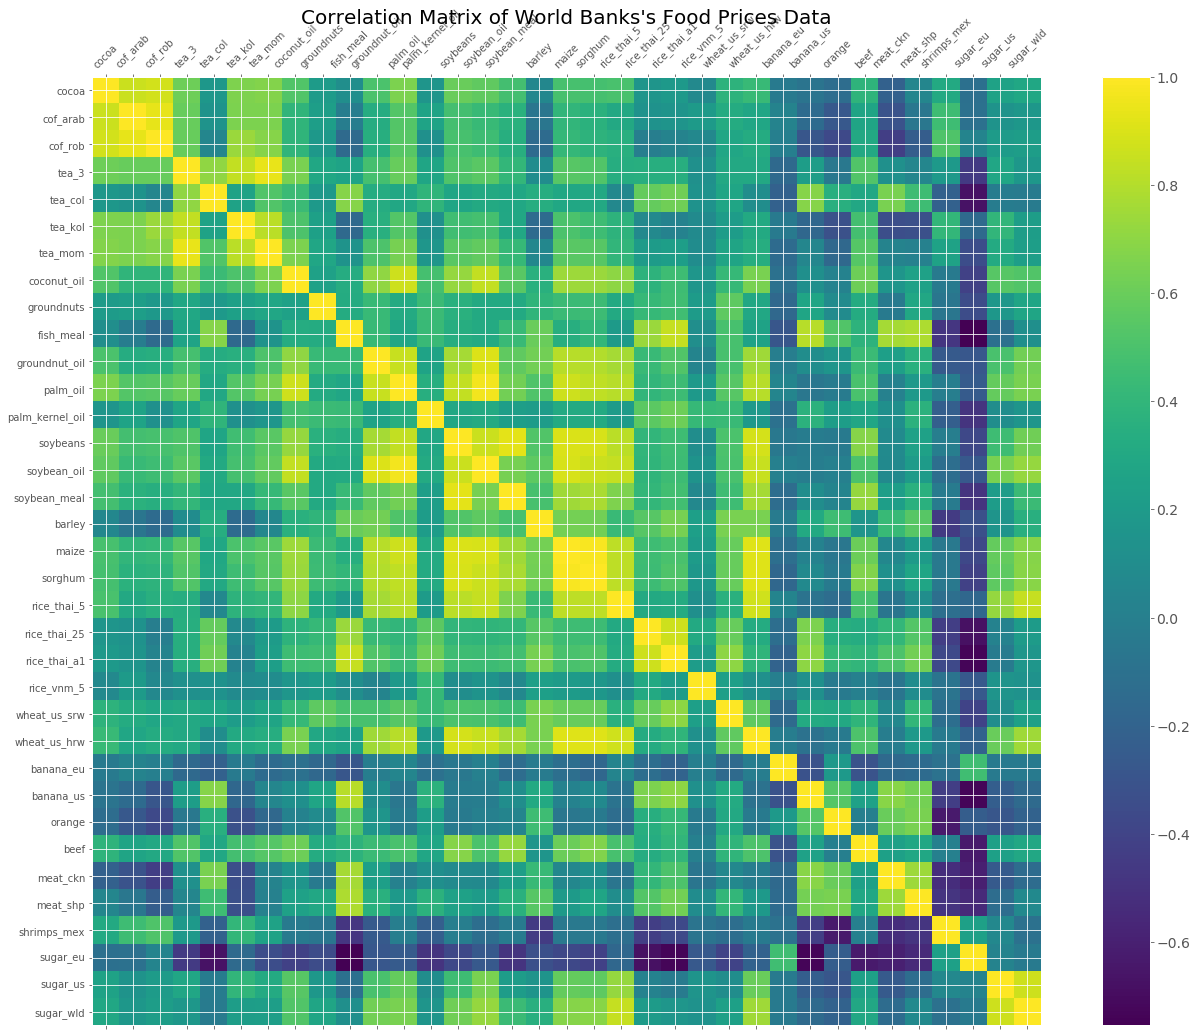

In [100]:
# Plot correlation matrix
f = plt.figure(figsize = (22, 17))

plt.matshow(food_prices_wb_update_copy.corr(), fignum = f.number)

plt.xticks(range(food_prices_wb_update_copy.shape[1]), food_prices_wb_update_copy.columns, fontsize = 10, rotation = 45)
plt.yticks(range(food_prices_wb_update_copy.shape[1]), food_prices_wb_update_copy.columns, fontsize = 10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title("Correlation Matrix of World Banks's Food Prices Data", fontsize = 20)
plt.show()

Prices of sugar traded in Europe demonstrate strong negative correlation with almost all other goods. At the other end of the spectrum are the prices of some soybean products measured against palm oil. In fact, most products demonstrate very week correlation against the others. This means a price change of food "A" is not linked to a price change of products "B", "C", etc.

It is interesting to see how food prices fluctuated over the years. For this reason, a new DataFrame titled `plot_certain_goods` is created with values of 12 products. The new table and the plots are illustrated below.

In [101]:
# Select 12 (random) food products to see how their prices fluctuated over the years
plot_certain_goods = food_prices_wb_update_copy[["cocoa", "fish_meal", "soybeans", "maize", 
                                                 "rice_thai_5", "rice_vnm_5", "wheat_us_srw", "banana_us",
                                                 "beef", "meat_ckn", "meat_shp", "sugar_eu"]] 

In [102]:
# Check if selection was successful
plot_certain_goods

,cocoa,fish_meal,soybeans,maize,rice_thai_5,rice_vnm_5,wheat_us_srw,banana_us,beef,meat_ckn,meat_shp,sugar_eu
year,,,,,,,,,,,,
1969,4.113398,871.133559,489.120344,239.580993,771.486385,377.335944,195.200699,0.730878,5.603257,1.835977,4.067591,0.514177
1970,2.907652,871.133559,503.634061,251.565752,544.089912,377.335944,195.200699,0.715426,5.618409,1.809085,4.067591,0.483382
1971,2.203595,871.133559,514.376980,239.200656,456.846629,377.335944,195.200699,0.574109,5.512503,1.802472,3.263444,0.466244
1972,2.418084,871.133559,525.670409,209.338853,486.054260,377.335944,195.200699,0.511027,5.558088,1.774602,4.010490,0.563310
1973,3.661782,871.133559,939.997719,316.712320,937.558689,377.335944,195.200699,0.469729,6.510509,1.712968,4.503733,0.476090
1974,4.147190,871.133559,735.699013,348.634545,1373.979345,377.335944,195.200699,0.488831,4.203580,1.484865,3.782131,0.623540
1975,2.980658,871.133559,526.080628,286.188659,816.758615,377.335944,195.200699,0.520698,3.174644,1.388973,3.534668,0.814327
1976,4.834464,871.133559,546.287109,265.553827,554.591697,377.335944,195.200699,0.611077,3.736178,1.442233,3.700928,0.697649
1977,8.285695,871.133559,612.489338,208.450416,551.404366,377.335944,195.200699,0.598461,3.293378,1.424904,3.717839,0.675354


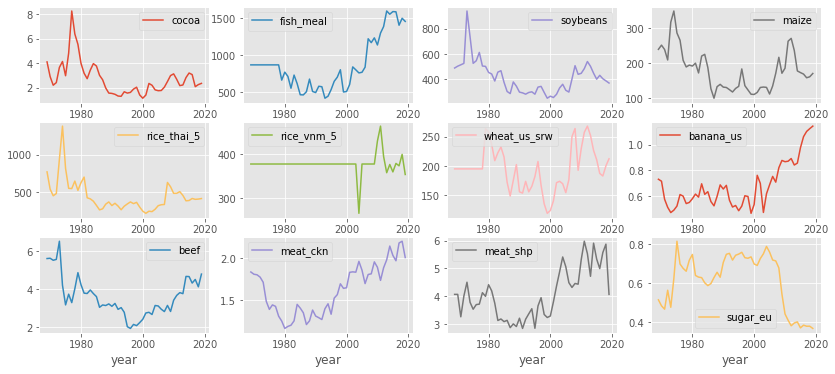

In [103]:
# Plot the dataframe using subplots
plt.style.use("ggplot")

plot_certain_goods.plot(subplots = True, layout = (3, 4), figsize = (14, 6), sharex = False)

plt.show()

As can be seen both on the DataFrame and on the plots, real prices of all goods fluctuated throughout the whole period. Some foods became cheaper (e.g. cocoa, soybeans, Thailand rice); others - more expensive (e.g. US bananas, fish meal, chicken and sheep meat), whereas the value of a third products group varied a lot (e.g. maize, Vietnamese rice, US wheat, and beef.   

It is hard to juxtapose real price dynamics with population changes. This is so because prices are measured in money (in this case in USD), whereas population - in number of people. Accordingly, the percentage change of each food's annual price is calculated; this will allow further computations and comparisons.

The annual percentage change of all foods' prices is stored in a new variable (`food_prices_wb_annual_pct_change`). It is calculated by applying the same formula as that for finding population change few lines above. Both the code and the new table follow on the next lines.

In [104]:
# Calculate percentage change of prices for each food item
food_prices_wb_annual_pct_change = food_prices_wb_update_copy.rolling(1, axis = 0).sum().pct_change(axis = 0)

In [105]:
# Check if calculation was performed properly
food_prices_wb_annual_pct_change

,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,fish_meal,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
year,,,,,,,,,,,,,,,,,,,,,
1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,-0.293126,0.229510,0.176926,0.080955,-0.012226,0.079597,0.159587,0.033571,0.000000,0.000000,...,0.000000,-0.021141,-0.070905,0.002704,-0.014647,0.000000,-0.103283,-0.059893,-0.012723,0.095256
1971,-0.242139,-0.177474,-0.030395,-0.031284,0.026855,-0.065332,-0.034155,-0.124938,0.000000,0.000000,...,0.000000,-0.197529,-0.134217,-0.018850,-0.003656,-0.197696,0.150219,-0.035453,0.005785,0.145757
1972,0.097336,0.025515,-0.019808,-0.157044,-0.052262,-0.212553,-0.175807,-0.412992,0.000000,0.000000,...,0.000000,-0.109878,-0.071449,0.008269,-0.015462,0.228913,0.142842,0.208186,-0.013950,0.482614
1973,0.514332,0.067319,-0.047889,-0.131096,-0.184608,-0.107383,-0.109385,0.889881,0.000000,0.000000,...,0.000000,-0.080813,-0.093126,0.171358,-0.034731,0.122988,0.046715,-0.154834,0.039779,0.122124
1974,0.132561,-0.132768,-0.034912,0.138625,0.103734,0.188930,0.114175,0.595706,0.000000,0.000000,...,0.000000,0.040667,-0.073826,-0.354339,-0.133162,-0.160223,-0.237258,0.309710,1.351095,1.576195
1975,-0.281282,-0.105420,-0.063177,-0.059761,-0.108159,0.039612,-0.131526,-0.644828,0.000000,0.000000,...,0.000000,0.065190,0.115925,-0.244776,-0.064580,-0.065429,0.139389,0.305973,-0.313649,-0.379719
1976,0.621945,1.155501,1.065072,0.026767,0.039605,-0.032834,0.095139,0.050636,0.000000,0.000000,...,0.000000,0.173573,-0.064154,0.176881,0.038345,0.047037,0.394863,-0.143281,-0.414924,-0.441943
1977,0.713881,0.519610,0.622009,0.523055,0.691314,0.348541,0.598331,0.278038,0.000000,0.000000,...,0.000000,-0.020645,0.087843,-0.118517,-0.012015,0.004570,-0.119074,-0.031958,-0.235169,-0.350416


Year 1969 was needed for computing foods' price change in 1970. It is removed now since it is not necessary anymore.

In [106]:
# Remove first row (year 1969) because not necessary anymore
food_prices_wb_annual_pct_change = food_prices_wb_annual_pct_change.drop([1969], axis = 0)

In [107]:
# Check if year 1969 was removed properly
food_prices_wb_annual_pct_change.head()

,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,fish_meal,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
year,,,,,,,,,,,,,,,,,,,,,
1970,-0.293126,0.229510,0.176926,0.080955,-0.012226,0.079597,0.159587,0.033571,0.0,0.0,...,0.0,-0.021141,-0.070905,0.002704,-0.014647,0.000000,-0.103283,-0.059893,-0.012723,0.095256
1971,-0.242139,-0.177474,-0.030395,-0.031284,0.026855,-0.065332,-0.034155,-0.124938,0.0,0.0,...,0.0,-0.197529,-0.134217,-0.018850,-0.003656,-0.197696,0.150219,-0.035453,0.005785,0.145757
1972,0.097336,0.025515,-0.019808,-0.157044,-0.052262,-0.212553,-0.175807,-0.412992,0.0,0.0,...,0.0,-0.109878,-0.071449,0.008269,-0.015462,0.228913,0.142842,0.208186,-0.013950,0.482614
1973,0.514332,0.067319,-0.047889,-0.131096,-0.184608,-0.107383,-0.109385,0.889881,0.0,0.0,...,0.0,-0.080813,-0.093126,0.171358,-0.034731,0.122988,0.046715,-0.154834,0.039779,0.122124
1974,0.132561,-0.132768,-0.034912,0.138625,0.103734,0.188930,0.114175,0.595706,0.0,0.0,...,0.0,0.040667,-0.073826,-0.354339,-0.133162,-0.160223,-0.237258,0.309710,1.351095,1.576195


It would be interesting to see some basic features for each product. Therefore, `pandas` `describe()` function is applied to the final version of the DataFrame. The table below shows that annual price change varied between - 0.321682 (cocoa) and 1.696529 (sugar world). Beneath the table is a histogram showing how often and in what direction the annual price of four (randomly chosen) products changed.

In [108]:
# Check postitive and negative annual changes per product
food_prices_wb_annual_pct_change.describe()

,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,fish_meal,...,banana_eu,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.016122,0.033867,0.024631,0.007646,0.028378,-0.000099,0.014054,0.046565,0.020208,0.023346,...,-0.000340,0.017337,0.003919,0.004866,0.004069,0.007773,0.009872,-0.002351,0.020953,0.058305
std,0.250013,0.323944,0.318838,0.163410,0.224400,0.145316,0.218864,0.349623,0.202910,0.163452,...,0.074262,0.130868,0.156152,0.124686,0.068474,0.125039,0.150772,0.096344,0.263509,0.414211
min,-0.321682,-0.467477,-0.432844,-0.379433,-0.621638,-0.236097,-0.428673,-0.644828,-0.377383,-0.371713,...,-0.253899,-0.325994,-0.274596,-0.354339,-0.133162,-0.306982,-0.237258,-0.197925,-0.414924,-0.488508
25%,-0.186331,-0.175188,-0.136981,-0.086840,-0.063118,-0.107544,-0.115567,-0.224871,-0.112759,-0.038999,...,0.000000,-0.060175,-0.075029,-0.053048,-0.043596,-0.072259,-0.097550,-0.045157,-0.052947,-0.178273
50%,-0.027986,-0.018413,-0.030940,-0.017494,0.006924,-0.002165,-0.027610,0.040473,0.000000,0.000000,...,0.000000,0.018648,-0.019922,-0.003154,-0.002951,0.009727,-0.005511,-0.008424,-0.013337,-0.001557
75%,0.149876,0.117297,0.124871,0.085024,0.127856,0.055475,0.121022,0.320316,0.102694,0.090752,...,0.000000,0.085457,0.083944,0.075259,0.048513,0.107637,0.124449,0.036489,0.048364,0.170367
max,0.713881,1.185657,1.333558,0.523055,0.691314,0.402022,0.603149,0.889881,0.561800,0.455238,...,0.274419,0.429172,0.703390,0.240061,0.157388,0.281444,0.394863,0.309710,1.351095,1.696529


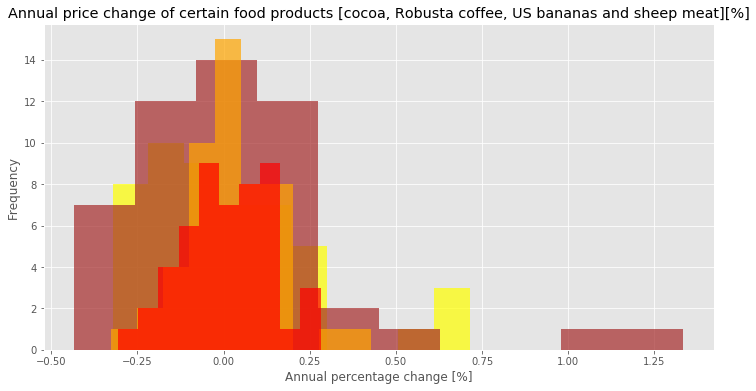

In [109]:
# Plot mean annual price change
plt.figure(figsize = (12, 6))
plt.hist(food_prices_wb_annual_pct_change["cocoa"], bins = 10, color = "yellow", alpha = 0.7)
plt.hist(food_prices_wb_annual_pct_change["cof_rob"], bins = 10, color = "brown", alpha = 0.7)
plt.hist(food_prices_wb_annual_pct_change["banana_us"], bins = 10, color = "orange", alpha = 0.7)
plt.hist(food_prices_wb_annual_pct_change["meat_shp"], bins = 10, color = "red", alpha = 0.7)

plt.title("Annual price change of certain food products [cocoa, Robusta coffee, US bananas and sheep meat][%]")
plt.xlabel("Annual percentage change [%]")
plt.ylabel("Frequency")

plt.show()

Frequency distribution above shows that these four food products' prices usually increased or decreased with 0.25 to 0.5 percentage points annually. Coffee, for example, was on the negative side of the spectrum, i.e. its prices steadily fell year after year but on few occasions its value rose by 1 to 1.25 percentage points. In sum, it could be said that the cumulative price change of all four products is negative. 

Annual average fluctuations are not visualised; instead, a quasi indicator showing the average price change for all items per year ( "all_avg_change_pct" in `food_prices_wb_annual_pct_change`) is created (see below). It might not be very justified from a mathematical and/or from a statistically point of view - at least a weight to the different food products should be assigned since people do not consume them equally. Nonetheless, this step is skipped here to keep the exercise as simple and clear as possible.

In [110]:
# Create new column ("all_avg_change_pct") and calculate average price change (in percentage) 
#for all products, for each year
food_prices_wb_annual_pct_change["all_avg_change_pct"] = food_prices_wb_annual_pct_change.mean(axis=1)

Annual average products' price change is displayed below (DataFrame's last column). All values range between minus 15%, i.e. the cumulative price of all products fell by 15% (year 1986), and plus 20%, i.e. it rose by one fifth (year 1973). All fluctuations are illustrated on the figure under the table.

In [111]:
# Check if calculation was peformed properly
food_prices_wb_annual_pct_change

,cocoa,cof_arab,cof_rob,tea_3,tea_col,tea_kol,tea_mom,coconut_oil,groundnuts,fish_meal,...,banana_us,orange,beef,meat_ckn,meat_shp,shrimps_mex,sugar_eu,sugar_us,sugar_wld,all_avg_change_pct
year,,,,,,,,,,,,,,,,,,,,,
1970,-0.293126,0.229510,0.176926,0.080955,-0.012226,0.079597,0.159587,0.033571,0.000000,0.000000,...,-0.021141,-0.070905,0.002704,-0.014647,0.000000,-0.103283,-0.059893,-0.012723,0.095256,0.017752
1971,-0.242139,-0.177474,-0.030395,-0.031284,0.026855,-0.065332,-0.034155,-0.124938,0.000000,0.000000,...,-0.197529,-0.134217,-0.018850,-0.003656,-0.197696,0.150219,-0.035453,0.005785,0.145757,-0.029106
1972,0.097336,0.025515,-0.019808,-0.157044,-0.052262,-0.212553,-0.175807,-0.412992,0.000000,0.000000,...,-0.109878,-0.071449,0.008269,-0.015462,0.228913,0.142842,0.208186,-0.013950,0.482614,-0.017562
1973,0.514332,0.067319,-0.047889,-0.131096,-0.184608,-0.107383,-0.109385,0.889881,0.000000,0.000000,...,-0.080813,-0.093126,0.171358,-0.034731,0.122988,0.046715,-0.154834,0.039779,0.122124,0.201517
1974,0.132561,-0.132768,-0.034912,0.138625,0.103734,0.188930,0.114175,0.595706,0.000000,0.000000,...,0.040667,-0.073826,-0.354339,-0.133162,-0.160223,-0.237258,0.309710,1.351095,1.576195,0.145004
1975,-0.281282,-0.105420,-0.063177,-0.059761,-0.108159,0.039612,-0.131526,-0.644828,0.000000,0.000000,...,0.065190,0.115925,-0.244776,-0.064580,-0.065429,0.139389,0.305973,-0.313649,-0.379719,-0.131436
1976,0.621945,1.155501,1.065072,0.026767,0.039605,-0.032834,0.095139,0.050636,0.000000,0.000000,...,0.173573,-0.064154,0.176881,0.038345,0.047037,0.394863,-0.143281,-0.414924,-0.441943,0.056218
1977,0.713881,0.519610,0.622009,0.523055,0.691314,0.348541,0.598331,0.278038,0.000000,0.000000,...,-0.020645,0.087843,-0.118517,-0.012015,0.004570,-0.119074,-0.031958,-0.235169,-0.350416,0.093989
1978,-0.227343,-0.402346,-0.432844,-0.379433,-0.621638,-0.219593,-0.341225,0.016838,0.000000,0.000000,...,-0.097063,0.016848,0.221393,-0.082367,0.110216,-0.122720,-0.021746,0.092684,-0.171359,-0.086297


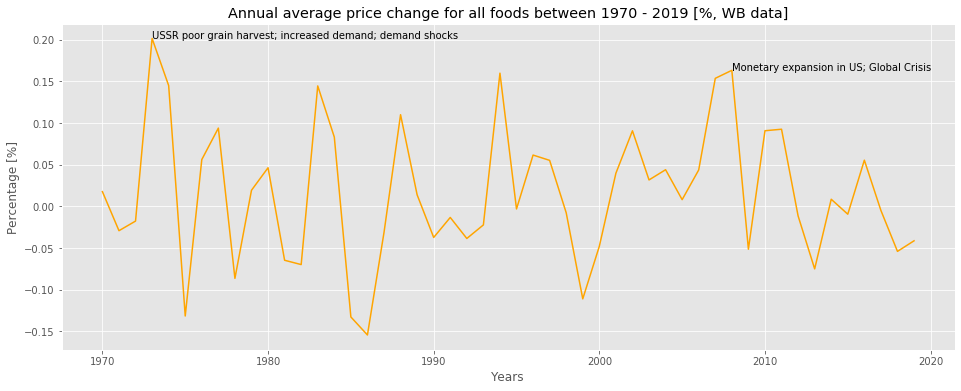

In [112]:
# Plot annual average change of food prices
plt.style.use("ggplot")
plt.figure(figsize = (16, 6))

plt.plot(food_prices_wb_annual_pct_change["all_avg_change_pct"], c = "orange")

plt.title("Annual average price change for all foods between 1970 - 2019 [%, WB data]")
plt.xlabel("Years")
plt.ylabel("Percentage [%]")

plt.text(1973, 0.201517, "USSR poor grain harvest; increased demand; demand shocks")
plt.text(2008, 0.163298, "Monetary expansion in US; Global Crisis")

plt.show()

The figure above illustrates how average price change of all products varied over the years. It never crossed the boundary of 20% (positive or negative), save in 1973 when the then USSR, due to its poor grain harvest, turned to the international stock markets for satisfying internal demand. The same year registered demand shocks on the international food market[3]. Another price peak was registered in 2008, when the Global Financial and Economic Crisis started, and when the US government decided to tackle it by monetary expansion[3].

It is strongly recommended to juxtapose World Bank's data with data from another source since the former's suggest the prices didn't fall a lot during the analysed period. The first choice, of course, should be the UN's "Food and Agriculture Organisation" (FAO).

### 3.4. Obtain another set  of food data: FAO

FAO maintains a web page (FAOSTAT) where users can choose a topic and download data. *Producer Prices* section with data from 1966 until 1990 could be found [here](http://www.fao.org/faostat/en/#data/PA). Users can download or visualize data. In the former case, they are required to select the countries, products, and years, which they need. The downloaded 'csv' file exceeds 21 MB (139 000 rows with several columns). Unnecessary columns were manually removed in order to make the file lighter. Nonetheless, its size was still big (5.8 MB).

FAO data for and post 1991 could be obtained from another [link](http://www.fao.org/faostat/en/#data/PP). Similarly, users should chose countries, foods, and the period for which they want data. The second 'csv' file has more than 152 000 rows. Unnecessary columns were also removed. The file was still too large after manual "cleaning"  - its size was reduced from 16 MB to 5 MB.

In addition to size, data in these files are inconvenient for comparison with the World Bank's ones - products are not the same, prices are given in local currency, etc. If needed, "cleaned" FAO files could be reviewed / downloaded from [here](https://raw.githubusercontent.com/atkovacheva/ds/master/FAOSTAT_data_7-28-2020_prior1990_edt.csv) and [here](https://raw.githubusercontent.com/atkovacheva/ds/master/FAOSTAT_data_7-28-2020_post1990_edt.csv).

Accordingly, the work proceeds with data from a third source.

### 3.5. Obtain a third set of food data: 'Our World in Data'

The third source of data is "Our World in Data" [site](https://ourworldindata.org/). In addition to food prices, it collects and stores various datasets. The food data are downloaded from [here](http://www.sfu.ca/~djacks/data/boombust/Real%20commodity%20prices,%201850-2019.xlsx). More information about each food item could be obtained from the following  [link](https://ourworldindata.org/food-prices#long-term-food-commodity-prices-since-1850).

The source offers global coverage from 1850 until 2019. Originally, the data were published in "From Boom to Bust: A Typology of Real Commodity Prices in the Long Run." NBER Working Paper 18874." (based on analysis published in: Jacks (2016). Chartbook for “From Boom to Bust”). Commodity prices are given as a price index relative to real prices in 1900, where 1900 = 100. For convenience, manipulations below assume the prices are in USD. In fact, the analysis looks into price dynamics over the years and is not much interested in their real values.

The work continues with downloading and calling "Our World in Data" (OWD) dataset. The excel file is saved in the 'data' folder and as a constant (`OWD_FOOD_PRICES`) at the top of this notebook. It is called through the standard `pandas` method (`pd.read_excel()`) and is saved as `food_prices_owd`. The needed data is found in the "Commodities" sheet. Its first row is skipped since could not be regarded as an appropriate multiindex element.

In [113]:
# Call OWD data on food prices 
food_prices_owd = pd.read_excel(OWD_FOOD_PRICES, sheet_name = "Commodities", skiprows = 1)

In [114]:
# Check if calling was successful and how the DataFrame looks like
food_prices_owd

,(1900=100),Beef,Hides,Lamb,Pork,Coal,Natural gas,Petroleum,Barley,Corn,...,Coffee,Cotton,Cottonseed,Palm oil,Peanuts,Rubber,Sugar,Tea,Tobacco,Wool
0,1850,76.806945,64.517834,78.369120,55.130659,94.967993,NaN,NaN,116.838423,98.802688,...,138.990669,134.813384,NaN,117.305152,NaN,NaN,210.842593,191.122176,181.269681,121.184291
1,1851,78.465394,77.741098,81.923191,76.308440,108.084136,NaN,NaN,126.472132,98.941296,...,120.275422,111.491127,NaN,111.848853,NaN,NaN,224.011008,182.445759,202.114122,129.031982
2,1852,80.214890,73.566807,81.048177,92.363720,104.162783,NaN,NaN,143.713616,106.765164,...,112.380173,110.300301,NaN,114.606142,NaN,NaN,196.047017,155.164150,180.213298,144.904317
3,1853,100.915506,85.270617,99.468218,84.039276,113.500597,NaN,NaN,166.828394,109.236924,...,115.685472,107.056174,NaN,146.221629,NaN,NaN,221.618367,193.163534,183.081085,156.979677
4,1854,102.380952,90.769231,91.525424,67.311469,128.817143,NaN,NaN,166.453066,118.176680,...,123.175182,86.567164,NaN,174.545455,NaN,NaN,196.078431,180.652681,169.194131,134.126984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2015,209.470808,39.366049,162.668056,13.718665,176.117435,116.452851,305.775321,42.672996,32.835573,...,58.591933,25.706420,46.052894,25.292049,29.343313,4.556291,17.051181,29.864492,84.312228,24.044190
166,2016,184.254536,31.543451,140.441655,12.450531,148.966451,109.907148,267.735145,36.092694,30.444140,...,59.257333,26.755560,43.531360,27.699559,30.931770,4.596483,22.624667,28.513138,81.529556,25.973293
167,2017,194.909163,28.330072,163.367451,13.341344,181.678859,127.793869,309.006163,33.205122,28.781201,...,53.344031,29.510372,32.816193,27.681965,32.326605,5.594808,19.651900,32.738400,77.722214,27.233392
168,2018,181.926642,23.490375,170.020703,11.854402,241.204038,132.262123,384.079772,41.790583,29.014763,...,45.892085,31.488660,30.467873,22.982786,28.015132,4.284209,14.972615,28.902532,78.845403,37.078418


Before to proceed further, it is important to see what the products in these 41 columns are. This is performed by applying the `unique` function on the DataFrame's features.

In [115]:
# Check unique columns in the DataFrame
food_prices_owd.columns.unique

<bound method Index.unique of Index(['(1900=100)', 'Beef', 'Hides', 'Lamb', 'Pork', 'Coal', 'Natural gas',
       'Petroleum', 'Barley', 'Corn', 'Rice', 'Rye', 'Wheat', 'Aluminum',
       'Chromium', 'Copper', 'Lead', 'Manganese', 'Nickel', 'Steel', 'Tin',
       'Zinc', 'Bauxite', 'Iron ore', 'Phosphate', 'Potash', 'Sulfur', 'Gold',
       'Platinum', 'Silver', 'Cocoa', 'Coffee', 'Cotton', 'Cottonseed',
       'Palm oil', 'Peanuts', 'Rubber', 'Sugar', 'Tea', 'Tobacco', 'Wool'],
      dtype='object')>

The *out* line above shows that there are non-food commodities. Accordingly, the work should continue with data cleaning and tidying.

### 3.6. Clean 'Our World in Data' food prices data

The first step is to remove all columns with non-food products and to check if the operation was successful. This is performed by `pandas` `drop()` method, and thereafter - by calling the DataFrame (only the first 5 rows for space efficiency).

In [116]:
# Remove all non-food columns.
food_prices_owd = food_prices_owd.drop(["Hides", "Coal", "Natural gas", "Petroleum", "Aluminum",
                                       "Chromium", "Copper", "Lead", "Manganese", "Nickel", "Steel", "Tin",
                                        "Zinc", "Bauxite", "Iron ore", "Phosphate", "Potash", "Sulfur", "Gold",
                                        "Platinum", "Silver", "Rubber", "Cottonseed", "Tobacco", "Wool", "Cotton"], axis = 1)

In [117]:
# Check if removal was successful
food_prices_owd.head()

,(1900=100),Beef,Lamb,Pork,Barley,Corn,Rice,Rye,Wheat,Cocoa,Coffee,Palm oil,Peanuts,Sugar,Tea
0,1850,76.806945,78.369120,55.130659,116.838423,98.802688,124.966975,189.657514,98.048727,79.912101,138.990669,117.305152,NaN,210.842593,191.122176
1,1851,78.465394,81.923191,76.308440,126.472132,98.941296,118.758435,205.835232,70.051464,78.668958,120.275422,111.848853,NaN,224.011008,182.445759
2,1852,80.214890,81.048177,92.363720,143.713616,106.765164,132.176235,224.243244,68.536056,63.192990,112.380173,114.606142,NaN,196.047017,155.164150
3,1853,100.915506,99.468218,84.039276,166.828394,109.236924,160.080107,200.921899,111.946487,92.880480,115.685472,146.221629,NaN,221.618367,193.163534
4,1854,102.380952,91.525424,67.311469,166.453066,118.176680,166.216216,146.903261,152.599007,94.584369,123.175182,174.545455,NaN,196.078431,180.652681


Since most computations are performed on an annual (or a product) basis, the next logical step is to set "year" as an index column. A quick check follows under the code line.

In [118]:
# Set year for index column
food_prices_owd = food_prices_owd.set_index("(1900=100)")

In [119]:
# Check if index set properly
food_prices_owd.head()

,Beef,Lamb,Pork,Barley,Corn,Rice,Rye,Wheat,Cocoa,Coffee,Palm oil,Peanuts,Sugar,Tea
(1900=100),,,,,,,,,,,,,,
1850,76.806945,78.369120,55.130659,116.838423,98.802688,124.966975,189.657514,98.048727,79.912101,138.990669,117.305152,NaN,210.842593,191.122176
1851,78.465394,81.923191,76.308440,126.472132,98.941296,118.758435,205.835232,70.051464,78.668958,120.275422,111.848853,NaN,224.011008,182.445759
1852,80.214890,81.048177,92.363720,143.713616,106.765164,132.176235,224.243244,68.536056,63.192990,112.380173,114.606142,NaN,196.047017,155.164150
1853,100.915506,99.468218,84.039276,166.828394,109.236924,160.080107,200.921899,111.946487,92.880480,115.685472,146.221629,NaN,221.618367,193.163534
1854,102.380952,91.525424,67.311469,166.453066,118.176680,166.216216,146.903261,152.599007,94.584369,123.175182,174.545455,NaN,196.078431,180.652681


The amended data are stored in a new DataFrame `food_prices_owd_edt` for avoiding losing information. Thereafter, all unnecessary year columns (i.e. from 1850 until 1968; 1969 is kept for upcoming calculations) are removed. These operations are performed on the next lines. A quick check as to if they were successful follows below. 

In [120]:
# Store cleaned (so far) data in new DataFrame
food_prices_owd_edt = food_prices_owd

In [121]:
# Remove unnecessary columns
food_prices_owd_edt = food_prices_owd_edt.drop([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
                                                                         1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
                                                                         1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879,
                                                                         1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
                                                                         1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899,
                                                                         1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
                                                                         1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
                                                                         1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
                                                                         1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
                                                                         1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
                                                                         1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
                                                                         1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968], axis = 0)


In [122]:
# Check if removal was successful
food_prices_owd_edt.head()

,Beef,Lamb,Pork,Barley,Corn,Rice,Rye,Wheat,Cocoa,Coffee,Palm oil,Peanuts,Sugar,Tea
(1900=100),,,,,,,,,,,,,,
1969,363.144406,251.138186,57.341118,58.120818,71.399351,55.501977,44.750423,43.552381,57.192761,94.161074,44.630113,88.075864,26.259701,50.474629
1970,365.684591,250.871677,55.506041,56.571637,75.969197,40.486373,41.413568,46.723604,40.601047,116.267398,60.500248,86.535331,28.884173,54.794258
1971,361.783092,231.249032,44.293108,58.404976,71.666675,35.378980,36.056546,45.529470,31.026495,96.430324,58.205988,88.153463,33.370189,53.522666
1972,385.172843,299.915558,62.508901,59.888157,66.883054,39.391862,37.309086,51.043789,35.950347,104.420712,46.910219,90.350330,52.241733,47.640168
1973,492.634101,456.731426,89.643619,95.697693,106.168013,73.371437,69.814926,105.765167,59.443384,121.691435,76.749537,95.698683,64.008513,45.198561


The next step is to check columns' value type by applying `pandas` `dtypes` function. As can be seen below, all columns contain floating point values. This suggests that there aren't `NaN` entries.

In [123]:
# Check columns' value type
food_prices_owd_edt.dtypes

Beef        float64
Lamb        float64
Pork        float64
Barley      float64
Corn        float64
Rice        float64
Rye         float64
Wheat       float64
Cocoa       float64
Coffee      float64
Palm oil    float64
Peanuts     float64
Sugar       float64
Tea         float64
dtype: object

Column names need to be changed so as to comply with Python convention. This is performed by renaming with the following code line:

In [124]:
# Rename columns to comply with Python convention.
food_prices_owd_edt = food_prices_owd_edt.rename(columns={"Beef":"beef", "Lamb":"lamb", "Pork":"pork", 
                                                          "Barley":"barley", "Corn":"corn", "Rice":"rice",
                                                          "Rye":"rye", "Wheat":"wheat", "Cocoa":"cocoa",
                                                          "Coffee":"coffee", "Palm oil":"palm_oil", 
                                                          "Peanuts":"peanuts", "Sugar":"sugar", "Tea":"tea"})

In [125]:
# Check if renaming was successful.
food_prices_owd_edt.head()

,beef,lamb,pork,barley,corn,rice,rye,wheat,cocoa,coffee,palm_oil,peanuts,sugar,tea
(1900=100),,,,,,,,,,,,,,
1969,363.144406,251.138186,57.341118,58.120818,71.399351,55.501977,44.750423,43.552381,57.192761,94.161074,44.630113,88.075864,26.259701,50.474629
1970,365.684591,250.871677,55.506041,56.571637,75.969197,40.486373,41.413568,46.723604,40.601047,116.267398,60.500248,86.535331,28.884173,54.794258
1971,361.783092,231.249032,44.293108,58.404976,71.666675,35.378980,36.056546,45.529470,31.026495,96.430324,58.205988,88.153463,33.370189,53.522666
1972,385.172843,299.915558,62.508901,59.888157,66.883054,39.391862,37.309086,51.043789,35.950347,104.420712,46.910219,90.350330,52.241733,47.640168
1973,492.634101,456.731426,89.643619,95.697693,106.168013,73.371437,69.814926,105.765167,59.443384,121.691435,76.749537,95.698683,64.008513,45.198561


Upon this initial cleaning, the work proceeds with exploratory data analysis and data visualization.

### 3.7. Exploratory analysis and visualisation of 'Our World in Data' food prices data

As with World Bank's data, the first step is to check if there is, and if so - what the correlation of each product price against the others' is. This is done by applying `pandas` `corr()` function. The outcome is shown below. A block of code visualizing correlation follows under the matrix. Prior to that, however, the `shape` function returns DataFrame's dimensions: 51 rows and 14 columns (more than twice less than the World Bank's DataFrame).

To recall: values between 0 and 1 mean positive correlation, and between -1 and 0 - negative correlation. The closest the value to 1 or to -1, the strongest the link between the two variables is. And vice versa: a value approaching 0 indicates lack of or weak correlation between two attributes (food prices). Strong positive correlations are tinted in yellow or in light green, whereas week ones - in teal (a deep blue-green colour). Negative links are painted in blue: foods with strong negative correlation are marked in dark purple.

In [126]:
# Check DataFrame shape
food_prices_owd_edt.shape

(51, 14)

In [127]:
# Check if there is any correlation between each two products
food_prices_owd_edt.corr()

,beef,lamb,pork,barley,corn,rice,rye,wheat,cocoa,coffee,palm_oil,peanuts,sugar,tea
beef,1.000000,0.468400,0.808215,0.557830,0.786251,0.738957,0.564877,0.803275,0.656607,0.595944,0.740163,0.869683,0.543582,0.726640
lamb,0.468400,1.000000,0.483470,0.312014,0.333781,0.392892,0.130455,0.426040,0.610302,0.597086,0.444606,0.400033,0.258355,0.403077
pork,0.808215,0.483470,1.000000,0.571320,0.830946,0.757784,0.542541,0.805014,0.724245,0.710743,0.749629,0.853604,0.587547,0.809360
barley,0.557830,0.312014,0.571320,1.000000,0.860967,0.810658,0.867373,0.855931,0.517351,0.432541,0.813666,0.689160,0.743507,0.505936
corn,0.786251,0.333781,0.830946,0.860967,1.000000,0.935267,0.835285,0.948489,0.682338,0.617361,0.924505,0.898504,0.832526,0.768532
rice,0.738957,0.392892,0.757784,0.810658,0.935267,1.000000,0.802910,0.934794,0.666073,0.543501,0.911171,0.837670,0.893290,0.669843
rye,0.564877,0.130455,0.542541,0.867373,0.835285,0.802910,1.000000,0.807783,0.547349,0.463193,0.766074,0.671115,0.743439,0.476720
wheat,0.803275,0.426040,0.805014,0.855931,0.948489,0.934794,0.807783,1.000000,0.634452,0.550407,0.895892,0.830215,0.835892,0.652074
cocoa,0.656607,0.610302,0.724245,0.517351,0.682338,0.666073,0.547349,0.634452,1.000000,0.932524,0.790795,0.713713,0.455926,0.827780
coffee,0.595944,0.597086,0.710743,0.432541,0.617361,0.543501,0.463193,0.550407,0.932524,1.000000,0.702249,0.684726,0.368113,0.825648


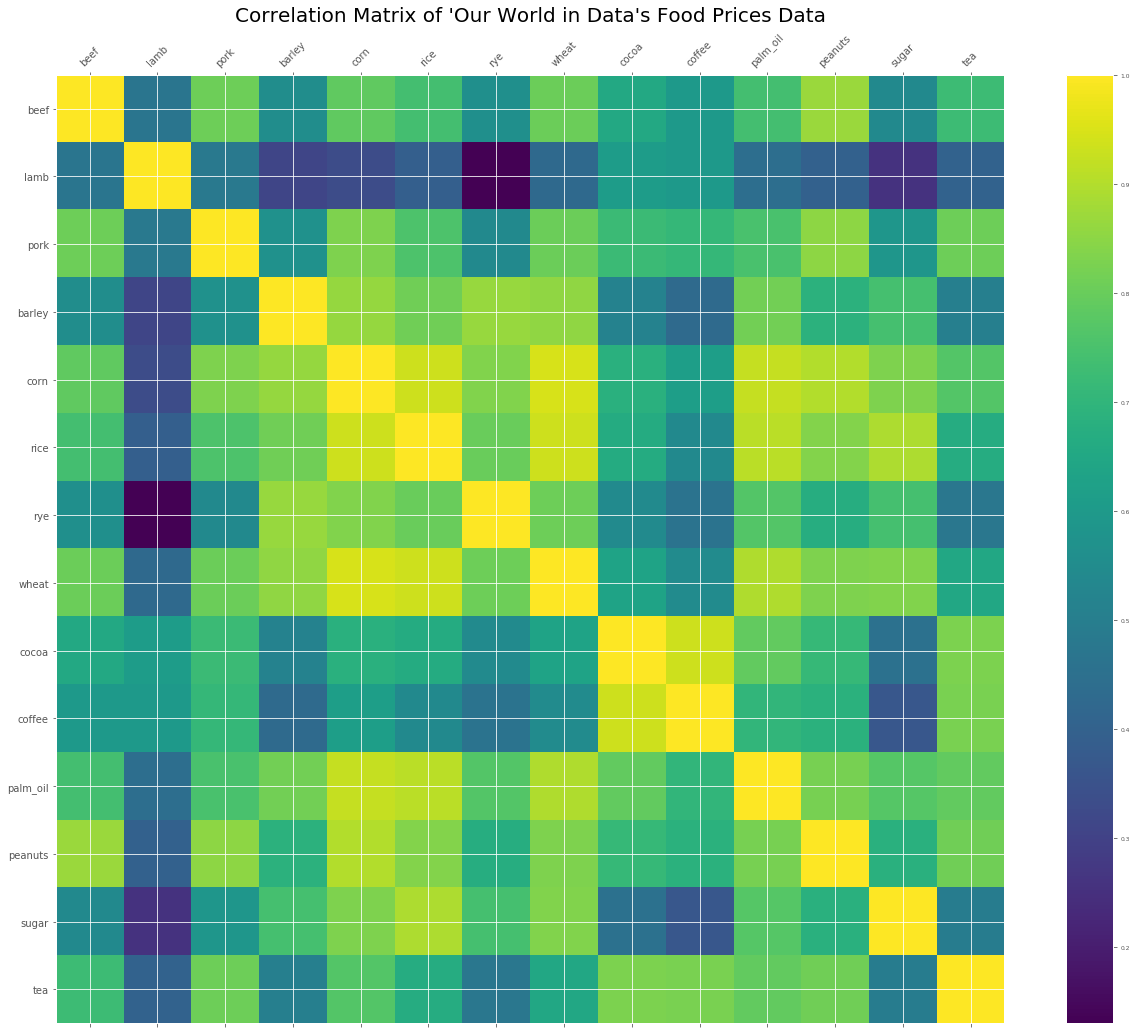

In [128]:
# Visualize collrelations
f = plt.figure(figsize = (22, 17))

plt.matshow(food_prices_owd_edt.corr(), fignum=f.number)

plt.xticks(range(food_prices_owd_edt.shape[1]), food_prices_owd_edt.columns, fontsize = 10, rotation = 45)
plt.yticks(range(food_prices_owd_edt.shape[1]), food_prices_owd_edt.columns, fontsize = 10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize = 6)
plt.title("Correlation Matrix of 'Our World in Data's Food Prices Data", fontsize = 20)
plt.show()

Strong negative correlation is observed for prices of lamb against all other products. Nearly strong positive correlation existed between prices of coffee and cocoa, and of corn and rice. Most other products demonstrate weak or none correlation against other commodities.

It is interesting to see how OWD food prices fluctuated over the years. The code line below recalls the DataFrame (for checks if needed) before plotting price dynamics.

In [129]:
# Recall food prices
food_prices_owd_edt.head()

,beef,lamb,pork,barley,corn,rice,rye,wheat,cocoa,coffee,palm_oil,peanuts,sugar,tea
(1900=100),,,,,,,,,,,,,,
1969,363.144406,251.138186,57.341118,58.120818,71.399351,55.501977,44.750423,43.552381,57.192761,94.161074,44.630113,88.075864,26.259701,50.474629
1970,365.684591,250.871677,55.506041,56.571637,75.969197,40.486373,41.413568,46.723604,40.601047,116.267398,60.500248,86.535331,28.884173,54.794258
1971,361.783092,231.249032,44.293108,58.404976,71.666675,35.378980,36.056546,45.529470,31.026495,96.430324,58.205988,88.153463,33.370189,53.522666
1972,385.172843,299.915558,62.508901,59.888157,66.883054,39.391862,37.309086,51.043789,35.950347,104.420712,46.910219,90.350330,52.241733,47.640168
1973,492.634101,456.731426,89.643619,95.697693,106.168013,73.371437,69.814926,105.765167,59.443384,121.691435,76.749537,95.698683,64.008513,45.198561


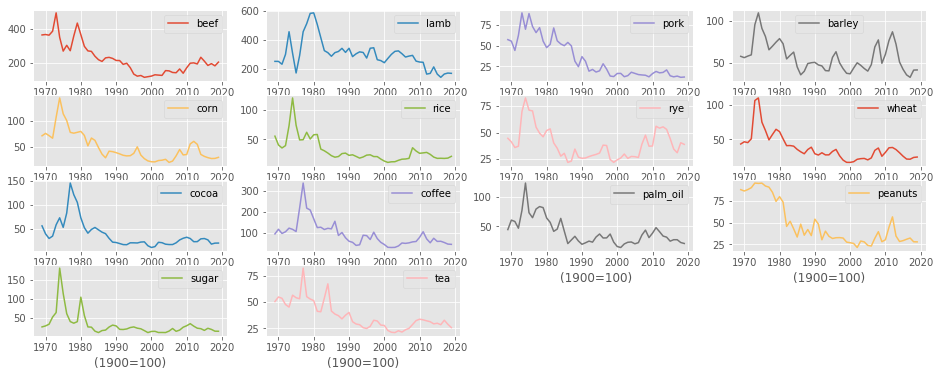

In [130]:
# Plot the dataframe using subplots
plt.style.use("ggplot")

food_prices_owd_edt.plot(subplots = True, layout = (4, 4), figsize = (16, 6), sharex = False)

plt.show()

The figures above show continuous (although fluctuating) decrease in prices of all foods. Dynamics of some commodities overlap with that of the World Bank's product prices (e.g. rice, cocoa, sugar). However, "Our World in Data" values for  lamb and beef dropped, whereas those of the World Bank - either vary a lot, or rose. The latter provides information about fish meal, wheat, bananas, and chicken meat - food stuffs with increasing price over the years, which don't present in the OWD database. Thus, direct comparison between prices in the two datasets is not of much use for the analysis.

It would be interesting to see if annual price changes follow the same dynamics as that of the World Bank prices. This requires computation of annual percentage change per product (data are stored in a new DataFrame `food_prices_owd_edt_annual_pct_change`). It is calculated by applying the same formula as that for finding population change. Both the code and the new table follow on the next lines.

In [131]:
# Calculate percentage change of prices for each food
food_prices_owd_edt_annual_pct_change = food_prices_owd_edt.rolling(1, axis = 0).sum().pct_change(axis = 0)

In [132]:
# Display annual price change (heading rows)
food_prices_owd_edt_annual_pct_change.head()

,beef,lamb,pork,barley,corn,rice,rye,wheat,cocoa,coffee,palm_oil,peanuts,sugar,tea
(1900=100),,,,,,,,,,,,,,
1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,0.006995,-0.001061,-0.032003,-0.026654,0.064004,-0.270542,-0.074566,0.072814,-0.290102,0.234771,0.355593,-0.017491,0.099943,0.085580
1971,-0.010669,-0.078218,-0.202013,0.032407,-0.056635,-0.126151,-0.129354,-0.025557,-0.235820,-0.170616,-0.037921,0.018699,0.155311,-0.023207
1972,0.064651,0.296938,0.411256,0.025395,-0.066748,0.113426,0.034738,0.121115,0.158698,0.082862,-0.194065,0.024921,0.565521,-0.109907
1973,0.278995,0.522867,0.434094,0.597940,0.587368,0.862604,0.871258,1.072048,0.653486,0.165396,0.636094,0.059196,0.225237,-0.051251


Year 1969 was removed since it is unnecessary for upcoming computations. A check as to if the operation was successful follows below.

In [133]:
# Remove year 1969 since not necessary anymore
food_prices_owd_edt_annual_pct_change = food_prices_owd_edt_annual_pct_change.drop([1969], axis = 0)

In [134]:
# Check if removal was successful
food_prices_owd_edt_annual_pct_change.head()

,beef,lamb,pork,barley,corn,rice,rye,wheat,cocoa,coffee,palm_oil,peanuts,sugar,tea
(1900=100),,,,,,,,,,,,,,
1970,0.006995,-0.001061,-0.032003,-0.026654,0.064004,-0.270542,-0.074566,0.072814,-0.290102,0.234771,0.355593,-0.017491,0.099943,0.085580
1971,-0.010669,-0.078218,-0.202013,0.032407,-0.056635,-0.126151,-0.129354,-0.025557,-0.235820,-0.170616,-0.037921,0.018699,0.155311,-0.023207
1972,0.064651,0.296938,0.411256,0.025395,-0.066748,0.113426,0.034738,0.121115,0.158698,0.082862,-0.194065,0.024921,0.565521,-0.109907
1973,0.278995,0.522867,0.434094,0.597940,0.587368,0.862604,0.871258,1.072048,0.653486,0.165396,0.636094,0.059196,0.225237,-0.051251
1974,-0.291004,-0.325955,-0.220598,0.146590,0.341583,0.645176,0.184134,0.034738,0.243658,-0.047698,0.596836,-0.004368,1.828903,0.250317


In [135]:
# Check positive and negative changes per product
food_prices_owd_edt_annual_pct_change.describe()

,beef,lamb,pork,barley,corn,rice,rye,wheat,cocoa,coffee,palm_oil,peanuts,sugar,tea
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.002897,0.012304,-0.006296,0.010723,0.003672,0.009080,0.017825,0.008225,0.007746,0.025097,0.019165,-0.001579,0.056055,-0.001994
std,0.133049,0.210846,0.224123,0.191924,0.212272,0.264952,0.220885,0.219276,0.250093,0.314664,0.265343,0.210798,0.436159,0.153993
min,-0.291004,-0.445848,-0.383905,-0.357772,-0.342375,-0.427460,-0.346184,-0.316523,-0.337393,-0.436987,-0.495968,-0.389048,-0.532387,-0.383810
25%,-0.090283,-0.081565,-0.149822,-0.124629,-0.109099,-0.137306,-0.119995,-0.124549,-0.158609,-0.202878,-0.178758,-0.141553,-0.213950,-0.069440
50%,-0.010862,0.002564,-0.044026,-0.001651,-0.038250,0.007960,-0.008980,-0.001823,-0.022702,-0.027817,-0.010913,-0.016250,-0.014154,-0.024908
75%,0.062222,0.083209,0.101497,0.119532,0.066878,0.086278,0.070243,0.111738,0.119501,0.144609,0.221268,0.057930,0.194268,0.079357
max,0.319069,0.709672,0.492127,0.597940,0.587368,1.028658,0.871258,1.072048,0.740474,1.067083,0.636094,0.538289,1.828903,0.546687


The "described" table shows that annual prices change varied between - 0.532387 (sugar) and 1.828903 (sugar again). Annual average fluctuations are not visualised; instead, a quasi indicator showing average change in prices for all items per year ( "all_avg_change_pct_owd" in `food_prices_owd_edt_annual_pct_change`) is created (see below). As mentioned above, it might not be very justified from a mathematical and/or from a statistically point of view. Ususally, a weight to the different foods would be assigned since people do not consume all products equally. This step is skipped, however, for keeping the exercise as simple and clear as possible.

It is interesting to see how annual price change is distributed for the same products (where available) plotted above.

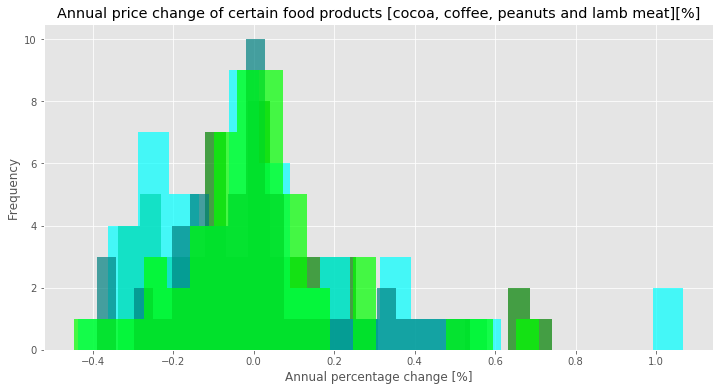

In [136]:
# Plot annual price change
plt.figure(figsize = (12, 6))
plt.hist(food_prices_owd_edt_annual_pct_change["cocoa"], bins = 20, color = "green", alpha = 0.7)
plt.hist(food_prices_owd_edt_annual_pct_change["coffee"], bins = 20, color = "cyan", alpha = 0.7)
plt.hist(food_prices_owd_edt_annual_pct_change["peanuts"], bins = 20, color = "teal", alpha = 0.7)
plt.hist(food_prices_owd_edt_annual_pct_change["lamb"], bins = 20, color = "lime", alpha = 0.7)

plt.title("Annual price change of certain food products [cocoa, coffee, peanuts and lamb meat][%]")
plt.xlabel("Annual percentage change [%]")
plt.ylabel("Frequency")
plt.show()

Similarly to the World Bank's data, OWD annual prices change was in the negative spectrum, too. The highest frequency for all four products is recorded in the zero and zero to minus 0.2 percentage segment. Coffee and cocoa, from time to time, became more expensive with 0.5 - to 1 percentage points. 

The annual average change for all products is recorded a new column titled "all_avg_change_pct_owd".

In [137]:
# Create new column ("all_avg_change_pct_owd") and calculate average price change (in percentage) 
# for all products, for each year
food_prices_owd_edt_annual_pct_change["all_avg_change_pct_owd"] = food_prices_owd_edt_annual_pct_change.mean(axis = 1)

Annual average products' price change is displayed below (DataFrame's last column). All values range between minus 19%, i.e. the cumulative price of all products fell by 19% (year 1975), and plus 22%, i.e. it rose by more than one fifth (year 2008). All fluctuations are illustrated on the figure under the table.

In [138]:
# Call DataFrame to check average annual percentage change
food_prices_owd_edt_annual_pct_change

,beef,lamb,pork,barley,corn,rice,rye,wheat,cocoa,coffee,palm_oil,peanuts,sugar,tea,all_avg_change_pct_owd
(1900=100),,,,,,,,,,,,,,,
1970,0.006995,-0.001061,-0.032003,-0.026654,0.064004,-0.270542,-0.074566,0.072814,-0.290102,0.234771,0.355593,-0.017491,0.099943,0.085580,0.014806
1971,-0.010669,-0.078218,-0.202013,0.032407,-0.056635,-0.126151,-0.129354,-0.025557,-0.235820,-0.170616,-0.037921,0.018699,0.155311,-0.023207,-0.063553
1972,0.064651,0.296938,0.411256,0.025395,-0.066748,0.113426,0.034738,0.121115,0.158698,0.082862,-0.194065,0.024921,0.565521,-0.109907,0.109200
1973,0.278995,0.522867,0.434094,0.597940,0.587368,0.862604,0.871258,1.072048,0.653486,0.165396,0.636094,0.059196,0.225237,-0.051251,0.493952
1974,-0.291004,-0.325955,-0.220598,0.146590,0.341583,0.645176,0.184134,0.034738,0.243658,-0.047698,0.596836,-0.004368,1.828903,0.250317,0.241594
1975,-0.231509,-0.445848,0.271120,-0.167787,-0.208729,-0.385512,-0.138522,-0.316523,-0.268657,-0.089705,-0.405428,0.003250,-0.368823,-0.043244,-0.199708
1976,0.126467,0.709672,-0.175847,-0.105499,-0.112392,-0.338457,-0.010371,-0.159118,0.552466,1.063166,-0.114628,-0.035146,-0.465848,-0.017217,0.065518
1977,-0.104840,0.565748,-0.100979,-0.193698,-0.221451,0.007235,-0.216492,-0.214007,0.740474,0.543188,0.224821,-0.013579,-0.340337,0.546687,0.087341
1978,0.319069,0.122012,0.091750,0.066592,-0.019811,0.257093,-0.102263,0.157462,-0.165553,-0.354551,0.052591,-0.066259,-0.105092,-0.329806,-0.005483


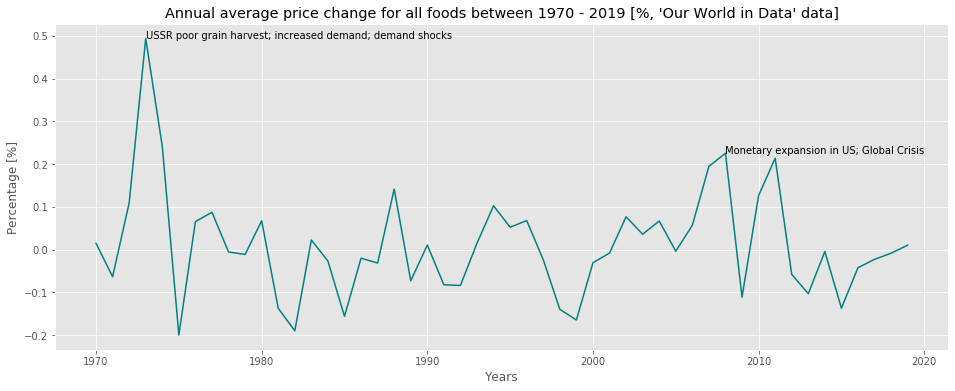

In [139]:
# Plot annual average change of food prices
plt.style.use("ggplot")
plt.figure(figsize = (16, 6))

plt.plot(food_prices_owd_edt_annual_pct_change["all_avg_change_pct_owd"], color = "teal")

plt.title("Annual average price change for all foods between 1970 - 2019 [%, 'Our World in Data' data]")
plt.xlabel("Years")
plt.ylabel("Percentage [%]")

plt.text(1973, 0.493952, "USSR poor grain harvest; increased demand; demand shocks")
plt.text(2008, 0.225411, "Monetary expansion in US; Global Crisis")

plt.show()

This figure very much resembles the one created with data from the World Bank. Both figures show that the food prices increased a lot in the early 1970's. The other significant peaks were in 2008 and in 2011, which are related to the Global Financial and Economic Crisis (2008-2009), when the US supplied a lot of money to alleviate the expected negative consequences, and to the raise in oil prices, occurred in [early 2011](https://www.macrotrends.net/1369/crude-oil-price-history-chart).

In conclusion of Chapter 3 it could be said that both datasets show price drops for many food products. It seems the ones that became more expensive over the years significantly influenced price dynamics. As a result, the average annual price change moved up and down with a minor step.

The next analystical phase is to test if the price changes affected world population dynamics during the observed period.

## 4. Test hypothesis

### 4.1. Create and calculate dummy food product prices 

In order to facilitate hypothesis testing, comparisons and analysis are performed with the help of a **dummy food product** (one for each source - World Bank, and for "Our World in Data"). It is taken that the average food price in 1970 amounted to 100 currency units. Thereafter, it changed according to the average percentage change, calculated in the previous Chapter.

This time, the analysis starts with the values computed from "Our World in Data".

#### 4.1.1. Dummy food prices based on 'Our World in Data' data

The first thing to do is to extract the annual average percentage change from the OWD table (data are stored in `dummy_food`). Thereafter, an additional column with starting price 100 units in 1970 is created. For processing purposes all rows are with the same index (due to the applied `groupby()` function later). Years are stored in a separate column. Column "all_avg_change_pct_owd" is renamet to "x", and the dummy product prices are computed in column "r" (manually created). These operations are performed below.

In [140]:
# Create a DataFrame with the annual average change (in percentage) for all food products and name it "dummy_food_owd"
dummy_food = food_prices_owd_edt_annual_pct_change[["all_avg_change_pct_owd"]]

In [141]:
# Check how the new DataFrame looks like
dummy_food.head()

,all_avg_change_pct_owd
(1900=100),
1970,0.014806
1971,-0.063553
1972,0.109200
1973,0.493952
1974,0.241594


In [142]:
# Check general information about the dataframe
dummy_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2019
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   all_avg_change_pct_owd  50 non-null     float64
dtypes: float64(1)
memory usage: 800.0 bytes


In [143]:
# Rename column "all_avg_change_pct_owd" to "x"
dummy_food = dummy_food.rename(columns = {"all_avg_change_pct_owd": "x"})

In [144]:
# Check if renaming was successful
dummy_food.head()

,x
(1900=100),
1970,0.014806
1971,-0.063553
1972,0.109200
1973,0.493952
1974,0.241594


In [145]:
# Create a new empty column ("r"), with value (100) only for the first year
dummy_food["r"] = dummy_food.insert(1, "r", [100, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                                                                    0, 0, 0, 0, 0, 0, 0, 0, 0, 0], True)

In [146]:
# Check if creation was successful. Not.
dummy_food.head()

,x,r
(1900=100),,
1970,0.014806,None
1971,-0.063553,None
1972,0.109200,None
1973,0.493952,None
1974,0.241594,None


The values of the manually created column "r", instead of zeroes, contain `None` values. These could not be used for the upcoming computations. Therefore, the first thing to do is to check column types.

In [147]:
# Check information about the DataFrame, in particular about column types
dummy_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   r       0 non-null      object 
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


For one reason or for another, column "r" values are 'object' type, i.e. impossible for making calculations. An attempt to change its type is performed below by filling in all empty cells with "100".

In [148]:
# Fill all cells of "r" column with value equal to 100
dummy_food = dummy_food.fillna(100)

In [149]:
# Check if the operation was successful
dummy_food.head()

,x,r
(1900=100),,
1970,0.014806,100
1971,-0.063553,100
1972,0.109200,100
1973,0.493952,100
1974,0.241594,100


Filling in was successful. Now, the column value type is 'int64' (see below), i.e. calculations will be possible.

In [150]:
# Check column types
dummy_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1970 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     float64
 1   r       50 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


The formula used for calculating annual price of the dummy product uses the `pandas` `groupby()` function. It is assumed that the best attribute for grouping would be the index column. For this reason, the work proceeds with resetting and setting the DataFrame index.

In [151]:
# Reset index of the DataFrame, which later will be used for grouping.
dummy_food = dummy_food.reset_index()

In [152]:
# Check if resetting index was successful
dummy_food.head()

,(1900=100),x,r
0,1970,0.014806,100
1,1971,-0.063553,100
2,1972,0.109200,100
3,1973,0.493952,100
4,1974,0.241594,100


Let the index column value is set to 100 (in fact, its value does not matter.)

In [153]:
# Inserting new column "idx", which values will be moved for index
dummy_food["idx"] = dummy_food.insert(1, "idx", [100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                                   100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                                   100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                                   100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                                   100, 100, 100, 100, 100, 100, 100, 100, 100, 100], True)

In [154]:
# Check if insertion was successful. Yes, but not with the desired values.
dummy_food.head()

,(1900=100),idx,x,r
0,1970,None,0.014806,100
1,1971,None,-0.063553,100
2,1972,None,0.109200,100
3,1973,None,0.493952,100
4,1974,None,0.241594,100


Again, instead of "100", `pandas` sets "None" as a value in all "idx" column cells. Nonetheless, it is set for index column. 

In [155]:
# Set "idx" column for index
dummy_food = dummy_food.set_index("idx")

In [156]:
# Check if operation was successful
dummy_food.head()

,(1900=100),x,r
idx,,,
NaN,1970,0.014806,100
NaN,1971,-0.063553,100
NaN,1972,0.109200,100
NaN,1973,0.493952,100
NaN,1974,0.241594,100


The check above shows the "idx" was set for an index column successfully.

The next step is to calculate annual price change of the dummy food.

##### Recursive formula for calculating annual price change of dummy products 

Annual price change is computed by applying a formula for recursive calculation. It is taken from [here](https://stackoverflow.com/questions/43710057/calculate-dataframe-values-recursively) and adapted for the current task. The formula is stored in a function since it will be applied both to the food and to the population data.

In [157]:
# Create function for recursive calculation of values in column "r".
# Result is a function from a previous value (in "r") amended with the figure in "x".
def rolling_apply(group):
    """
    Function: calculates changes step by step taking values from previous periods, adjusted with a given coefficient.
    
    Parameters: a DataFrame with duplicated values in one (or more) of its attributes.
    
    Returns: new values determined by the initial value and adjusted with the given coefficient, grouped around desired value.
    """
    r = [group.r.iloc[0]]
    for x in group.x[:-1]:
        r.append((r[-1] + x))
               
    group.r = r
    return group

##### Formula application problems

This formula was applied to the OWD dummy food product.

In [158]:
#dummy_food.r = dummy_food.groupby(dummy_food.index).apply(rolling_apply).r

For one reason or another it returns the following error:

>AttributeError                            Traceback (most recent call last)
<ipython-input-164-005c89e8ddf0> in <module>

>----> 1 dummy_food.r = dummy_food.groupby(dummy_food.index).apply(rolling_apply).r

>~\anaconda3\lib\site-packages\pandas\core\generic.py in __getattr__(self, name)
   5272             if self._info_axis._can_hold_identifiers_and_holds_name(name):
   5273                 return self[name]
-> 5274             return object.__getattribute__(self, name)
   5275 
   5276     def __setattr__(self, name: str, value) -> None:

>AttributeError: 'DataFrame' object has no attribute 'r'

In order to avoid this setback, the DataFrame is constructed manually, meaning all its features and values are set by hand. A `pandas` user who faced the [same problem](https://github.com/pandas-profiling/pandas-profiling/issues/183) suggests installing "pandas-profiling", which in the present case turned out to be unsuccessful.

#### 4.1.2. Dummy food prices based on 'Our World in Data' data (manually)

The DataFrame for an OWD dummy product is created again, this time - manually (`dummy_food_owd`). The index column value is '2020' everywhere; years are as they appear in the final dataset; values of column "x" correspond to the ones in column "all_avg_change_pct_owd" of `food_prices_owd_edt_annual_pct_change`. Only the first (zero) cell of column "r" gets a value, i.e. 100 currency units. The remaining are set to zero.

In [159]:
# Create entirely new DataFrame, called "dummy_food_owd". Values of "x" and "r" are the same as those in the previous 
# DataFrame. Years are entered manually, as well as the index column ("2020")
dummy_food_owd = pd.DataFrame({
    "year": [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'x': [0.014806, -0.063553, 0.1092, 0.493952, 0.241594, -0.199708, 0.065518, 0.087341, -0.005483, -0.011353, 
         0.067503, -0.137288, -0.189996, 0.022524, -0.026849, -0.156042, -0.020072, -0.031464, 0.141679, -0.072972,
         0.010636, -0.082227, -0.083864, 0.015009, 0.102495, 0.052313, 0.068004, -0.023725, -0.13966, -0.164709, 
          -0.030701, -0.008061, 0.07674, 0.035994, 0.06689, -0.003691, 0.056814, 0.194755, 0.225411, -0.111229, 
          0.126321, 0.213762, -0.057785, -0.103239, -0.004389, -0.136965, -0.042371, -0.022774, -0.008344, 0.010416],
    'r': [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}, index=["2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020"])

The next code line checks if the DataFrame was created successfully.

In [160]:
# Check if the dataframe was created successfully
dummy_food_owd.head()

,year,x,r
2020,1970,0.014806,100
2020,1971,-0.063553,0
2020,1972,0.109200,0
2020,1973,0.493952,0
2020,1974,0.241594,0


It seems the DataFrame is alright. Now, the recursive function is applied to it.

In [161]:
# Apply the function to the new DataFrame
dummy_food_owd.r = dummy_food_owd.groupby(dummy_food_owd.index).apply(rolling_apply).r

The outcome below shows how the price of the fictious OWD food product that costed 100 currency units in 1970 changed over time (column "r"). If visualised, the curve will be no different from the one illustrated the annual average price dynamics (calculated a dozen lines above). No surprises so far.

In [162]:
# Check result. This times the function works.
dummy_food_owd

,year,x,r
2020,1970,0.014806,100.000000
2020,1971,-0.063553,100.014806
2020,1972,0.109200,99.951253
2020,1973,0.493952,100.060453
2020,1974,0.241594,100.554405
2020,1975,-0.199708,100.795999
2020,1976,0.065518,100.596291
2020,1977,0.087341,100.661809
2020,1978,-0.005483,100.749150
2020,1979,-0.011353,100.743667


#### 4.1.3. Dummy food prices based on World Bank data (manually)

The same operations are applied to the World Bank food data. To save time and space, and to avoid disappointments, the DataFrame is created manually, as above. It is stored in `dummy_food_wb`. The column names and values correspond to the ones in the OWD dummy product DataFrame.

In [163]:
# Create DataFrame, called "dummy_food_wb". Values of "x" correspond to the annual average change
# (in pct) for all products; "r" is the destination column where results should be recorded. 
# Years are entered manually, as well as the index column ("2020")
dummy_food_wb = pd.DataFrame({
    "year": [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    "x": [0.017752, -0.029106, -0.017562, 0.201517, 0.145004, -0.131436, 0.056218, 0.093989, -0.086297, 0.019383,
          0.046418, -0.064573, -0.069749, 0.144582, 0.083241, -0.13258, -0.154201, -0.031309, 0.110045, 0.013964,
          -0.037207, -0.01321, -0.038436, -0.022176, 0.159895, -0.003002, 0.061635, 0.055277, -0.00757, -0.110879,
          -0.047786, 0.039824, 0.090745, 0.031801, 0.044053, 0.008131, 0.043809, 0.153695, 0.163298, -0.051314,
          0.090829, 0.092632, -0.011365, -0.074887, 0.008637, -0.009317, 0.055476, -0.004826, -0.053913, -0.041214],
    "r": [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}, index=["2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020"])

The next code line checks if the DataFrame was created successfully.

In [164]:
# Check if the DataFrame was created successfully
dummy_food_wb.head()

,year,x,r
2020,1970,0.017752,100
2020,1971,-0.029106,0
2020,1972,-0.017562,0
2020,1973,0.201517,0
2020,1974,0.145004,0


It seems everything is alright. The next step is to apply the recursive function to the World Bank dummy food product.

In [165]:
# Apply the function to the  World Bank values
dummy_food_wb.r = dummy_food_wb.groupby(dummy_food_wb.index).apply(rolling_apply).r

The code line below checks if the function worked properly. It seems so. The price (in column "r") of the fictious food product (which costed 100 currency units in 1970), according to the computed World Bank annual average price change (column "x"), changed more or less over the years. If visualised, the curve will be no different from the one, illustrating the annual average price dynamics calculated in Chapter 3 above.

In [166]:
# Check if the function calculated the values properly
dummy_food_wb

,year,x,r
2020,1970,0.017752,100.000000
2020,1971,-0.029106,100.017752
2020,1972,-0.017562,99.988646
2020,1973,0.201517,99.971084
2020,1974,0.145004,100.172601
2020,1975,-0.131436,100.317605
2020,1976,0.056218,100.186169
2020,1977,0.093989,100.242387
2020,1978,-0.086297,100.336376
2020,1979,0.019383,100.250079


##### Concatenate dummy food prices

The analytical work proceeds with concatenating the two DataFrames. Since both have column titles with one and the same name, and in order to avoid "misinterpretation" errors, the latter is changed. Concatenated DataFrames are stored in a new variable called `final_table`.

In [167]:
# Rename columns in OWD DataFrame with more readable names
dummy_food_owd_fin = dummy_food_owd.rename({"year":"year_owd", "x":"avg_owd", "r":"dummy_owd"}, axis = 1)

In [168]:
# Check if renaming was successful
dummy_food_owd_fin.head()

,year_owd,avg_owd,dummy_owd
2020,1970,0.014806,100.000000
2020,1971,-0.063553,100.014806
2020,1972,0.109200,99.951253
2020,1973,0.493952,100.060453
2020,1974,0.241594,100.554405


In [169]:
# Rename columns in WB dataframe with more readable names
dummy_food_wb_fin = dummy_food_wb.rename({"year":"year_wb", "x":"avg_wb", "r":"dummy_wb"}, axis = 1)

In [170]:
# Check if renaming was successful
dummy_food_wb_fin.head()

,year_wb,avg_wb,dummy_wb
2020,1970,0.017752,100.000000
2020,1971,-0.029106,100.017752
2020,1972,-0.017562,99.988646
2020,1973,0.201517,99.971084
2020,1974,0.145004,100.172601


In [171]:
# Concatenate "World Bank" and "Our World in Data" dataframes
final_table = pd.concat([dummy_food_wb_fin, dummy_food_owd_fin], axis = 1)

In [172]:
# Check if concatenation was successful
final_table.head()

,year_wb,avg_wb,dummy_wb,year_owd,avg_owd,dummy_owd
2020,1970,0.017752,100.000000,1970,0.014806,100.000000
2020,1971,-0.029106,100.017752,1971,-0.063553,100.014806
2020,1972,-0.017562,99.988646,1972,0.109200,99.951253
2020,1973,0.201517,99.971084,1973,0.493952,100.060453
2020,1974,0.145004,100.172601,1974,0.241594,100.554405


Concatenation was successful. The DataFrame does not need two columns with years data, so one of them is removed. A check as to if removal was successful follows below.

In [173]:
# Remove one of the year columns
final_table = final_table.drop(["year_owd"], axis = 1)

In [174]:
# Check if removal was successful
final_table.head()

,year_wb,avg_wb,dummy_wb,avg_owd,dummy_owd
2020,1970,0.017752,100.000000,0.014806,100.000000
2020,1971,-0.029106,100.017752,-0.063553,100.014806
2020,1972,-0.017562,99.988646,0.109200,99.951253
2020,1973,0.201517,99.971084,0.493952,100.060453
2020,1974,0.145004,100.172601,0.241594,100.554405


As expected, annual prices of both dummy foods are quite similar. It would be interesting to see how they move up and down at a timeline graph. The plotting code follows below.

<Figure size 1152x720 with 0 Axes>

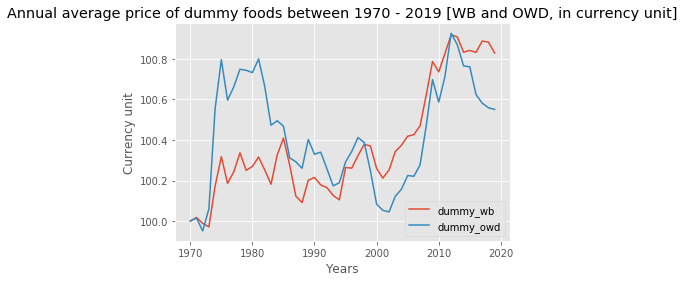

In [175]:
# Plot annual price change of the two dummy products
plt.figure(figsize = (16, 10))
plt.style.use("ggplot")
final_table.plot(x = "year_wb", y = ["dummy_wb", "dummy_owd"])

plt.title("Annual average price of dummy foods between 1970 - 2019 [WB and OWD, in currency unit]")
plt.xlabel("Years")
plt.ylabel("Currency unit")

plt.show()

This figure confirms the identical trend in food prices from both sources. Only "Our World in Data" registered higher increase between 1973 - 1982, when its dummy product value rose to 100.8 currency units; at the same time, the World Bank's fictious product costed between 100.3 and 100.4 units.

In sum, 50 years ago an average food price was higher than that 10 to 20 years later. After year 2000, however, foods became more expensive, at least until the Financial and Economic Crisis in 2008. Thereafter, prices started to drop.

### 4.2. Create and calculate dummy population variable

These dummy food prices should be compared to a population variable. Since comparing hundred units with thousands and million people is not convenient, average annual population change is used for calculating a dummy group of citizens. Similarly, its initial value is set to 100 people. In order to avoid the above stated error, the variable (`dummy_population`) is also constructed by hand. A quick check as to if the DataFrame was created successfully follows below the code lines.

In [176]:
# Create DataFrame, called "dummy_population". Values of "x" correspond to the annual average population change
# (in pct), and "r" is the destination column where results are to be recorded. 
# Years are entered manually, as well as the index column ("2020")
dummy_population = pd.DataFrame({
    "year": [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    "x": [0.02181, 0.022045, 0.021553, 0.021293, 0.021133, 0.020803, 0.020304, 0.019784, 0.019829, 0.020027,
          0.020363, 0.020606, 0.020716, 0.020644, 0.020905, 0.0213, 0.021547, 0.021646, 0.020661, 0.019592,
          0.018703, 0.018022, 0.016571, 0.015924, 0.015398, 0.014916, 0.015142, 0.014967, 0.014527, 0.014105,
          0.014336, 0.014183, 0.014657, 0.014592, 0.014976, 0.015314, 0.015677, 0.015567, 0.015494, 0.014766,
          0.014177, 0.013384, 0.013373, 0.013333, 0.013382, 0.013029, 0.012879, 0.012387, 0.01207, 0.012127],
    "r": [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}, index=["2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020",
          "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020", "2020"])

In [177]:
# Check if dataframe was created successfully
dummy_population.head()

,year,x,r
2020,1970,0.021810,100
2020,1971,0.022045,0
2020,1972,0.021553,0
2020,1973,0.021293,0
2020,1974,0.021133,0


The outcome above confirms the DataFrame is correct. Now, the recursive function is applied to it.

In [178]:
# Apply the function to population to fill null values
dummy_population.r = dummy_population.groupby(dummy_population.index).apply(rolling_apply).r

The code line below checks if the function worked properly. It seems so. The fictious "population" (in column "r") amounted to 100 people in 1970, and according to the World Bank computed average annual change (column "x"), changed upward over the years. If visualised, the curve will be no different from the one, illustrating the annual average population dynamics calculated in Chapter 1 above.

In [179]:
# Check if the operation was successful
dummy_population.head()

,year,x,r
2020,1970,0.021810,100.000000
2020,1971,0.022045,100.021810
2020,1972,0.021553,100.043855
2020,1973,0.021293,100.065408
2020,1974,0.021133,100.086701


The last operation in this subsection, is to prepare the DataFrame for concatenating to the one with food prices. To that end, the dummy population data are stored in a new variable (for avoiding mistakes in existing ones) (`dummy_population_fin`). Thereafter, the "year" column is removed (it won't be needed in the concatenated table) and columns are renamed with more readable ones. At last, a code checking if these operations were successful follows below.

In [180]:
# Create new variable for final calculations
dummy_population_fin = dummy_population

In [181]:
# Remove the "year" column since it won't be needed for concatenating with food data table
dummy_population_fin = dummy_population_fin.drop(["year"], axis = 1)

In [182]:
# Rename columns with more readable names
dummy_population_fin = dummy_population_fin.rename(columns = {"x":"avg_pop", "r":"dummy_pop"})

In [183]:
# Check if dropping and renaming were successful
dummy_population_fin.head()

,avg_pop,dummy_pop
2020,0.021810,100.000000
2020,0.022045,100.021810
2020,0.021553,100.043855
2020,0.021293,100.065408
2020,0.021133,100.086701


##### Concatenate dummy food prices with population dummy variable  

The final table (`final_table`) concatenates dummy food prices with dummy population DataFrame. A check as to if the concatenation was successful and how the DataFrame looks like follows below.

In [184]:
# Concatenate dummy population with the final table (dummy food prices)
final_table = pd.concat([final_table, dummy_population_fin], axis = 1)

In [185]:
# Check how final table looks like
final_table

,year_wb,avg_wb,dummy_wb,avg_owd,dummy_owd,avg_pop,dummy_pop
2020,1970,0.017752,100.000000,0.014806,100.000000,0.021810,100.000000
2020,1971,-0.029106,100.017752,-0.063553,100.014806,0.022045,100.021810
2020,1972,-0.017562,99.988646,0.109200,99.951253,0.021553,100.043855
2020,1973,0.201517,99.971084,0.493952,100.060453,0.021293,100.065408
2020,1974,0.145004,100.172601,0.241594,100.554405,0.021133,100.086701
2020,1975,-0.131436,100.317605,-0.199708,100.795999,0.020803,100.107834
2020,1976,0.056218,100.186169,0.065518,100.596291,0.020304,100.128637
2020,1977,0.093989,100.242387,0.087341,100.661809,0.019784,100.148941
2020,1978,-0.086297,100.336376,-0.005483,100.749150,0.019829,100.168725
2020,1979,0.019383,100.250079,-0.011353,100.743667,0.020027,100.188554


The figure below shows products' price and population over the years. The latter is illustrated with almost a straight line, whereas food prices fluctuated throughout the whole period.

<Figure size 1440x720 with 0 Axes>

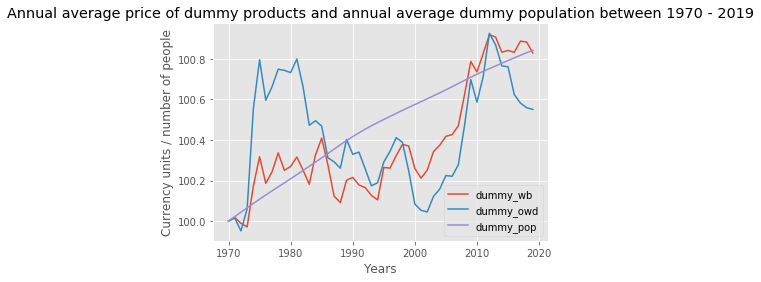

In [186]:
# Plot all three dummy variables
plt.figure(figsize = (20,10))
plt.style.use('ggplot')
final_table.plot(x = "year_wb", y = ["dummy_wb", "dummy_owd", "dummy_pop"])

plt.title("Annual average price of dummy products and annual average dummy population between 1970 - 2019")
plt.xlabel("Years")
plt.ylabel("Currency units / number of people")

plt.show()

### 4.3. Correlation analysis

Correlation analysis should reveal if there is a linear or non-linear (positive or negative) link between food prices and population change. If such a link exists, the resulting correlation should be either 1 (or -1) or should approach this figure. A coefficient equal to or close to zero suggests lack of relationship between the two variables.

#### 4.3.1. Preparation

Initial preparation requires "year" column to be temporary set for index. The data are stored into a new DataFrame (`final_table_update`) (to avoid mistakes in existing DataFrames). A quick check as to if this operation was successful follows below.

In [187]:
# Set "year" for index column and store data into a new DataFrame
final_table_update = final_table.set_index("year_wb")

In [188]:
# Check if operations were successful
final_table_update.head()

,avg_wb,dummy_wb,avg_owd,dummy_owd,avg_pop,dummy_pop
year_wb,,,,,,
1970,0.017752,100.000000,0.014806,100.000000,0.021810,100.000000
1971,-0.029106,100.017752,-0.063553,100.014806,0.022045,100.021810
1972,-0.017562,99.988646,0.109200,99.951253,0.021553,100.043855
1973,0.201517,99.971084,0.493952,100.060453,0.021293,100.065408
1974,0.145004,100.172601,0.241594,100.554405,0.021133,100.086701


The work proceeds with reseting index column. Now, the DataFrame is indexed automatically.

In [189]:
# Reset index and check if operation was successful
final_table_update1 = final_table_update.reset_index()
final_table_update1.head()

,year_wb,avg_wb,dummy_wb,avg_owd,dummy_owd,avg_pop,dummy_pop
0,1970,0.017752,100.000000,0.014806,100.000000,0.021810,100.000000
1,1971,-0.029106,100.017752,-0.063553,100.014806,0.022045,100.021810
2,1972,-0.017562,99.988646,0.109200,99.951253,0.021553,100.043855
3,1973,0.201517,99.971084,0.493952,100.060453,0.021293,100.065408
4,1974,0.145004,100.172601,0.241594,100.554405,0.021133,100.086701


#### 4.3.2. Choosing correlation method

According to Jason Brownlee, variables can be related by a linear relationship [11], which usually is called "*covariance*". It is calculated as the average of the product between the values from each sample, where the values have been centered (had their mean substracted) (see the formula below). 

$$cov(x, y) = \Sigma (x - \bar{x}) \ast (y - \bar{y}) \frac{1}{(n-1)} $$

In this formula $x$ is the first variable, $y$ is the second variable, $\bar{x}$ and $\bar{y}$ are their mean values, and $n$ is the number of observations.

The same author reminds that the use of the mean in the calculation suggests the need for each data sample to have a *Gaussian* or *Gaussian-like* distribution. Therefore, before to proceed ahead, each dimension of interest is stored in a separate variable and its distribution tested.

In [190]:
# Create a variable (Series) for dummy product of World Bank
dummy_product_wb = final_table_update1["dummy_wb"]

In [191]:
# Create a variable (Series) for dummy product of OWD
dummy_product_owd = final_table_update1["dummy_owd"]

In [192]:
# Create a variable (Series) for dummy population
dummy_population = final_table_update1["dummy_pop"]

The *covariance* between each pair of variables is calculated below.

In [193]:
# Calculate covariance between WB dummy food and dummy population
covariance_wb_pop = np.cov(dummy_product_wb, dummy_population)

In [194]:
# Print covariance matrix for WB dummy food and dummy population
covariance_wb_pop

array([[0.07757743, 0.05617098],
       [0.05617098, 0.06309595]])

In [195]:
# Calculate covariance between OWD dummy food and dummy population
covariance_owd_pop = np.cov(dummy_product_owd, dummy_population)

In [196]:
# Print covariance matrix for OWD dummy food and dummy population
covariance_owd_pop

array([[0.06855848, 0.01172937],
       [0.01172937, 0.06309595]])

The covariance between each pair is 0.05617098 and 0.01172937 respectively. Although negligible, it is positive, which might suggest that both variables (in each pair) changed in the same direction.

Before to proceed further, i.e. to choose a correlation coefficient for computations (Pearson's for checking linear correlation, and Spearman's for checking non-linear one), it should be found out if any or all variables have Gaussian or Gaussian-like distribution. 

Jason Brownlee reminds that Pearson’s correlation coefficient is calculated as a covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score. Thus, he argues, the use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution [11].

To comply with the above, distribution of all values in each variable is illustrated on plot below.

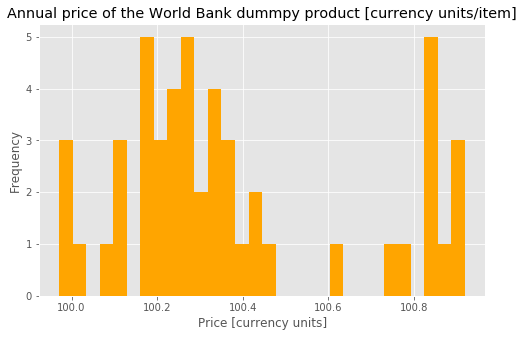

In [197]:
# Plot distribution of annual price of WB dummy product 
plt.figure(figsize = (8, 5))
plt.hist(dummy_product_wb, bins = 30, color = "orange")

plt.title("Annual price of the World Bank dummpy product [currency units/item]")
plt.xlabel("Price [currency units]")
plt.ylabel("Frequency")
plt.show()

The same formula is applied to the OWD dummy product.

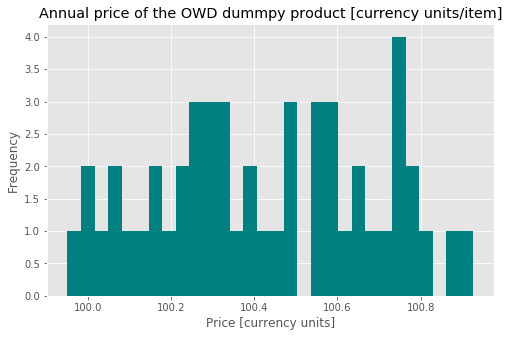

In [198]:
# Plot distribution of annual price of OWD dummy product 
plt.figure(figsize = (8, 5))
plt.hist(dummy_product_owd, bins = 30, color = "teal")

plt.title("Annual price of the OWD dummpy product [currency units/item]")
plt.xlabel("Price [currency units]")
plt.ylabel("Frequency")
plt.show()

Dummy population for each year is distributed as shown below. 

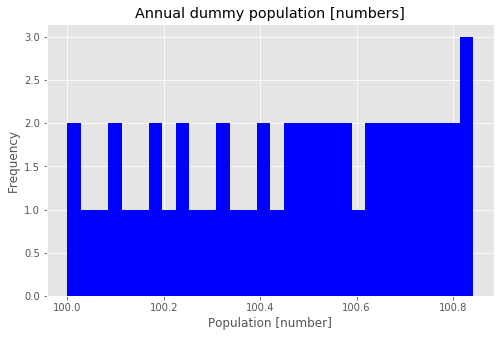

In [199]:
# Plot distribution of dummy population 
plt.figure(figsize = (8, 5))
plt.hist(dummy_population, bins = 30, color = "blue")

plt.title("Annual dummy population [numbers]")
plt.xlabel("Population [number]")
plt.ylabel("Frequency")
plt.show()

Neither variable demonstrates Gaussian or Gaussian-like distribution. Thus, according to Jason Brownlee, it can't be expected each pair to demonstrate linear correlation, i.e. Pearson coefficient should not be applied. Instead, Spearman's might be more appropriate.

#### 4.3.3. Computing correlation between World Bank food prices and population growth

Despite the above (preliminary) conclusion, it would be interesting to see how food data relate to population dynamics by applying both Pearson's (i.e. assuming there is a linear correlation between both variables) and Spearman's (non-linear relationship) coefficient.

It should be noted here that Kalinov[12] suggests using a particular correlation method depending on the scale applied for measuring each variable. He outlines four scales: (1) discrete-nominal; (2) continuous-nominal, (3) ranking; and (4) interval scale / relationship scale. In case both variables are measured by "relationship scale" (as is the case with food and population data), the author recommends using "Pearson coefficient". However, the latter is appropriate only if "the probabilistic distribution  of both variables is normal", i.e. Gaussian or Gaussian-like.

##### By Pearson's coefficient (assuming linear correlation)

In [200]:
# Check if there is correlation (Pearson method) between WB foods and population
corr_p_wb, _ = pearsonr(dummy_product_wb, dummy_population)

In [201]:
# Display Pearson correlation for WB food and population 
print("Pearsons correlation: %.3f" % corr_p_wb)

Pearsons correlation: 0.803


The applied function indicates, more or less, strong (linear) correlation between WB food prices and population change over the years (coefficient of 0.80). 

##### By Spearman's coefficient (assuming non-linear correlation)

In [202]:
# Check if there is correlation (Spearman method) between WB foods and population
corr_s_wb, _ = spearmanr(dummy_product_wb, dummy_population)

In [203]:
# Display Spearman correlation for WB food and population 
print("Spearmans correlation: %.3f" % corr_s_wb)

Spearmans correlation: 0.798


Using Spearman's method indicates slightly weaker positive (non-linear) correlation (0.789). 

The plot below illustrates the link between the two variables.

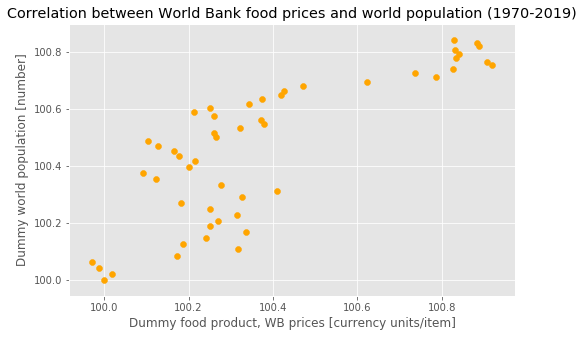

In [204]:
# Plot correlation for World Bank food and population dummy data 
plt.figure(figsize = (8, 5))
plt.style.use("ggplot")

plt.scatter(dummy_product_wb, dummy_population, c = "orange")

plt.xlabel("Dummy food product, WB prices [currency units/item]")
plt.ylabel("Dummy world population [number]")
plt.title("Correlation between World Bank food prices and world population (1970-2019)")

plt.show()

It might be tentatively assumed that this 0.80  (or 0.789) correlation coefficient is a result from the almost linear and slightly upward move of the dots in the space above 100.4 people and to the left of 100.4 currency units. Otherwise, the dots in the lower left angle indicate for lack of correlation.

#### 4.3.4. Correlation between 'Our World in Data' food prices and population growth

It would be interesting to see if "Our World in Data" food prices will have similar behaviour with regard to population. As above, the correlation is computed by applying both Pearson and Spearman methods.

##### By Pearson's coefficient (assuming linear correlation)

In [205]:
# Check if there is correlation (Pearson method) between OWD foods and population
corr_p_owd, _ = pearsonr(dummy_product_owd, dummy_population)

In [206]:
# Display Pearson correlation for OWD food and population 
print("Pearsons correlation: %.3f" % corr_p_owd)

Pearsons correlation: 0.178


The figure above suggests none or very weak linear correlation between the two variables. Let's check what the figure will be with Spearman's coefficient.

##### By Spearman's coefficient (assuming non-linear correlation)

In [207]:
# Check if there is correlation (Spearman method) between OWD foods and population
corr_s_owd, _ = spearmanr(dummy_product_owd, dummy_population)

In [208]:
# Display Spearman correlation for OWD food and population 
print("Spearmans correlation: %.3f" % corr_s_owd)

Spearmans correlation: 0.180


Again, the result indicates very, very weak correlation between OWD food prices and population growth. Let's illustrate them on a scatterplot.

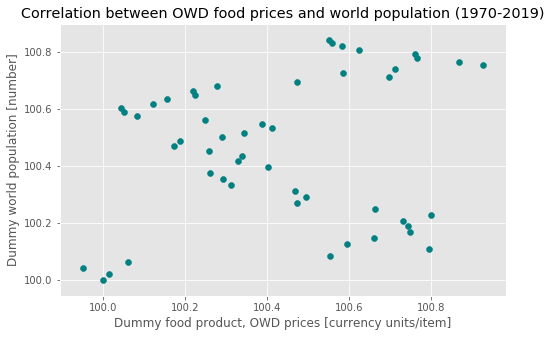

In [209]:
# Plot correlation for 'Our World in Data' food and population dummy data 
plt.figure(figsize = (8, 5))
plt.style.use("ggplot")

plt.scatter(dummy_product_owd, dummy_population, color = "teal")

plt.xlabel("Dummy food product, OWD prices [currency units/item]")
plt.ylabel("Dummy world population [number]")
plt.title("Correlation between OWD food prices and world population (1970-2019)")

plt.show()

The dots are scattered all around the plot. Several groupings could be identified: a minor one in the lower left angle; a larger in the upper right angle, and a third one moving from the upper left to the lower right angle. Still, the applied correlation method speaks about neither linear nor non-linear correlation (coefficient of 0.178 / 0.180).

#### 4.3.5. Computing combibed correlation

To illustrate (non-linear) correlation between each pair of variables, the same operations are applied over a combined DataFrame (contating both the WB and OWD food prices, and world population). The needed data are stored in `final_table_corr`, and later - in `correlation_all`.

In [210]:
# Create a new variable which will be used for combined correlation analysis
final_table_corr = final_table_update

In [211]:
# Remove unnecessary columns from combined correlation dataframe
final_table_corr = final_table_corr.drop(["avg_wb", "avg_owd", "avg_pop"], axis = 1)

In [212]:
# Check how combined correlation dataframe looks like
final_table_corr.head()

,dummy_wb,dummy_owd,dummy_pop
year_wb,,,
1970,100.000000,100.000000,100.000000
1971,100.017752,100.014806,100.021810
1972,99.988646,99.951253,100.043855
1973,99.971084,100.060453,100.065408
1974,100.172601,100.554405,100.086701


In [213]:
# Prepare variable to calculate correlation between the three variables
correlation_all = final_table_corr[["dummy_wb", "dummy_owd", "dummy_pop"]]

In [214]:
# Calculate correlation between the three variables
correl_all = correlation_all.corr(method = "spearman")

The outcome below only confirms the figures computed in the previous subsection: higher correlation between WB food prices and world population, and almost none correlation between OWD commodities' value and population.

In [215]:
# View correlation between the three variables
correl_all

,dummy_wb,dummy_owd,dummy_pop
dummy_wb,1.000000,0.552077,0.797551
dummy_owd,0.552077,1.000000,0.179640
dummy_pop,0.797551,0.179640,1.000000


In sum, the calculations above didn't prove that there is a link between food prices and population increase in the last 50 years. The latter means tha H0 (zero hypothesis) should not be rejected.

## 5. Conclusion and Topics for Further Discussion

The initial assumption that population grew due to due to cheapening of food products over the years didn't prove true, at least by using the World Bank and the OWD data. Nonetheless, food prices kept at almost the same levels as in each preceding year might were one of the many factors affecting population numbers. This is an issue for further research and discussion.

Another topic for additional analysis could be what would have happened (how population would have changed) if there weren't technology improvements, and the size of arable lands remained the same as that in 1970. Provided that population increased, it could be assumed the demand for food would also go up, hence its prices, too. How this would affect population dynamics, remains an open question.

For the time being, the zero-hypothesis (no link between food prices and population growth) remains valid.

# THE END

## References

[1] Prateek Agarwal. Malthusian Theory of Population. Intelligent Economist, 14.01.2020, https://www.intelligenteconomist.com/malthusian-theory/ (Accessed online: August 2020).

[2] RESET. Global Food Waste and its Environmental Impact. September 2018, https://en.reset.org/knowledge/global-food-waste-and-its-environmental-impact-09122018 (Accessed online: August 2020).

[3] Douglas Southgate. Population Growth, Increases in Agricultural Production and Trends in Food Prices. The Electronic Journal of Sustainable Development (2009) I(3), https://www.researchgate.net/profile/Douglas_Southgate/publication/42766072_Population_Growth_Increases_in_Agricultural_Production_and_Trends_in_Food_Prices/links/00b7d526073d7649aa000000/Population-Growth-Increases-in-Agricultural-Production-and-Trends-in-Food-Prices.pdf#page=47 (Accessed online: August 2020). 

[4] Pew Research Centre. The Future of World Religions: Population Growth Projections, 2010-2050. Chapter 1: Main Factors Driving Population Growth. 02.04.2015, https://www.pewforum.org/2015/04/02/main-factors-driving-population-growth/ (Accessed online: August 2020).

[5] Van Bavel J. The world population explosion: causes, backgrounds and -projections for the future. Facts Views Vis Obgyn. 2013;5(4):281-291. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3987379/ (Accessed online: August 2020).

[6] World Bank. World Population, Total. https://data.worldbank.org/indicator/SP.POP.TOTL. (Accessed online: August 2020).

[7] World Bank. World Bank Commodity Price Data, https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjhj62Kg4LrAhViTxUIHdNbD44QFjAAegQIAxAB&url=http%3A%2F%2Fpubdocs.worldbank.org%2Fen%2F226371486076391711%2FCMO-Historical-Data-Annual.xlsx&usg=AOvVaw32xYgMfKQEeHcSPuHa8r5U (Accessed online: August 2020).

[8] United Nation Food and Agriculture Organisation. FAOSTAT, Producer Prices 1966 - 1990, http://www.fao.org/faostat/en/#data/PA (Accessed online: August 2020).

[9] United Nation Food and Agriculture Organisation. FAOSTAT, Producer Prices 1966 - 1990, http://www.fao.org/faostat/en/#data/PP (Accessed online: August 2020).

[10] Our World in Data, Long-term food commodity prices since 1850, https://ourworldindata.org/food-prices#long-term-food-commodity-prices-since-1850 (Accessed online: August 2020).

[11] Jason Brownlee, How to Calculate Correlation Between Variables in Python. Machine Learning Mastery, 27 April, 2018, https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/ (Accessed online: August 2020).

[12] Калинов, К. (2001). Статистически методи в поведенческите и социалните науки. Нов български университет. ISBN 954-535-239-6.